## Assessment Title: Integrated CA 

## Lecturer Name: David McQuaid & Muhammad Iqbal

## Student Full Name & Student ID:  Deniz OZSOY UGUR - 2023195 

### Link to Dataset

https://data.gov.ie/dataset/dublin-ringsend-rainfall-data?package_type=dataset

### GitHub Repository: 

https://github.com/denizozsoyugur/2023195_Integrated_CA

# Introduction

In [1]:
#pip install dash dash-core-components dash-html-components dash-table plotly

In [2]:
#pip install dash-bootstrap-components

In [3]:
#pip install plotly

In [4]:
#pip install pandas

In [5]:
#pip install --upgrade transformers

In [6]:
# Import NumPy, Pandas, Matplotlib, Seaborn libraries and Plotly Express

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

from dateutil.parser import parse 
import matplotlib as mpl
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [7]:
# Import warnings and apply filterwarnings to ignore them.

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("irish_monthly_rainy_weather.csv")

# pd.read_csv function in order to read the csv file

In [9]:
df.head(5)

#  Print the first 5 rows of the dataframe by applying the.head() function

,year,month,ind,rain,gdf,rd,wd
0,1941,1,0,112.8,13,18,18
1,1941,2,0,69.5,13,22,15
2,1941,3,0,111,50,21,13
3,1941,4,0,68.6,16.5,15,12
4,1941,5,0,66.4,20.1,13,10


In [10]:
missing_values = ['/',' ','-','--','na','Na','n/a','NA','n.a.','?','nan','Nan','nul','Nul','null','Null']

df= pd.read_csv('irish_monthly_rainy_weather.csv',na_values=missing_values)

# Create a list with all the possible missing value formats. Create a name for the dataframe as report
# ('irish_monthly_rainy_weather')and apply the pd.read_csv function 
# Include the variable 'na_values' and define it with the 'missing values' list previously created

In [11]:
df.isnull().sum()

# Check missing values by applying the .isnull().sum method to the dataframe

year       0
month      0
ind        0
rain      50
gdf      104
rd        91
wd        91
dtype: int64

In [12]:
df.isnull().sum() / len(df) * 100

# Check missing values by applying the .isnull().sum method to the dataframe and divide it by the length of the dataframe,
# calculated with the len() function. Then, multiply the result * 100 to obtain a percentage

year      0.000000
month     0.000000
ind       0.000000
rain      5.192108
gdf      10.799585
rd        9.449637
wd        9.449637
dtype: float64

In [13]:
df.columns

# Check the column names of the dataframe by applying the .columns attribute

Index(['year', 'month', 'ind', 'rain', 'gdf', 'rd', 'wd'], dtype='object')

In [14]:
df.rename(columns={'year':'Year', 
                   'month':'Month', 'ind':'Indicator','rain':'Precipitation_Amount','gdf':'Greatest_Daily_Fall',
                   'rd':'Number_of_Rainy_Days', 'wd':'Number_of_Wet_Days'}, inplace=True)

# Rename the columns of the dataframe by applying the .rename() method

In [15]:
df.drop(columns=["Indicator"], inplace=True)

# Apply .drop() to remove the column as it contains the same index values

In [16]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112.8,13.0,18.0,18.0
1,1941,2,69.5,13.0,22.0,15.0


In [17]:
# I am creating a list of the columns to convert. These columns currently contain an object data type
# and missing values. To convert them, missing values will be replaced with '0'. Afterwards,
# the values will be converted from object to numeric to utilise all the features that apply to numeric data types

cols_to_convert = ['Year','Month','Precipitation_Amount',
                   'Greatest_Daily_Fall',
                   'Number_of_Rainy_Days','Number_of_Wet_Days']

In [18]:
# Fill the missing values with 0 for the specified columns by applying the .fillna() method

df[cols_to_convert] = df[cols_to_convert].fillna(0)

In [19]:
# Calculating the percentage of missing values in each column obtained by applying the isnull().sum() method to the
#social_housing dataframe and dividing the result by the total number of rows within the dataframe, whose number is obtained by
# applying the .len() function.

df.isnull().sum()/len(df)*100

Year                    0.0
Month                   0.0
Precipitation_Amount    0.0
Greatest_Daily_Fall     0.0
Number_of_Rainy_Days    0.0
Number_of_Wet_Days      0.0
dtype: float64

In [20]:
# Converting the specified columns from object to integer data type by applying the .astype() method

df[cols_to_convert] = df[cols_to_convert].astype(int)

In [21]:
# Displaying the summary information of the dataframe by applying the .info() method

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  963 non-null    int32
 1   Month                 963 non-null    int32
 2   Precipitation_Amount  963 non-null    int32
 3   Greatest_Daily_Fall   963 non-null    int32
 4   Number_of_Rainy_Days  963 non-null    int32
 5   Number_of_Wet_Days    963 non-null    int32
dtypes: int32(6)
memory usage: 22.7 KB


In [22]:
df.isnull().sum()

Year                    0
Month                   0
Precipitation_Amount    0
Greatest_Daily_Fall     0
Number_of_Rainy_Days    0
Number_of_Wet_Days      0
dtype: int64

In [23]:
df.shape

(963, 6)

In [24]:
df.head(5)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
0,1941,1,112,13,18,18
1,1941,2,69,13,22,15
2,1941,3,111,50,21,13
3,1941,4,68,16,15,12
4,1941,5,66,20,13,10


In [25]:
df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month']. astype(str), format='%Y-%m')

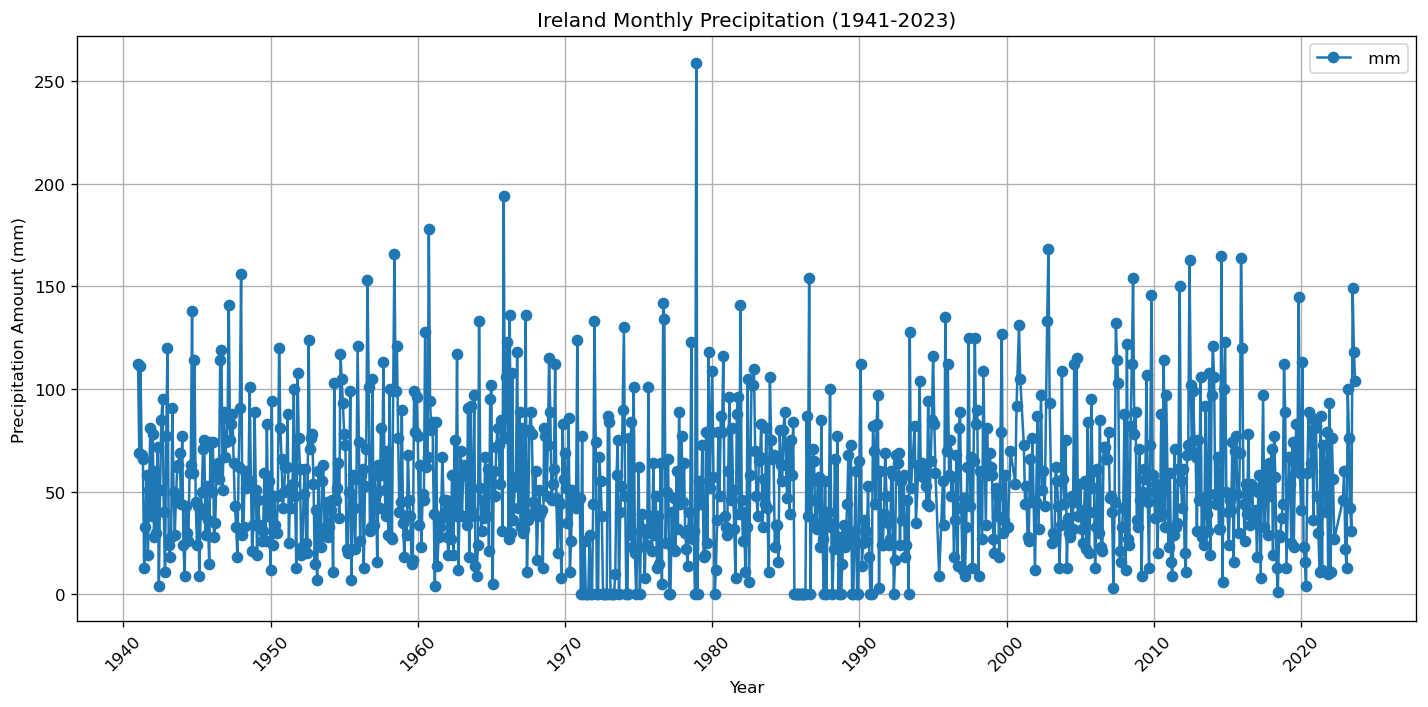

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['Precipitation_Amount'], label=' mm', marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

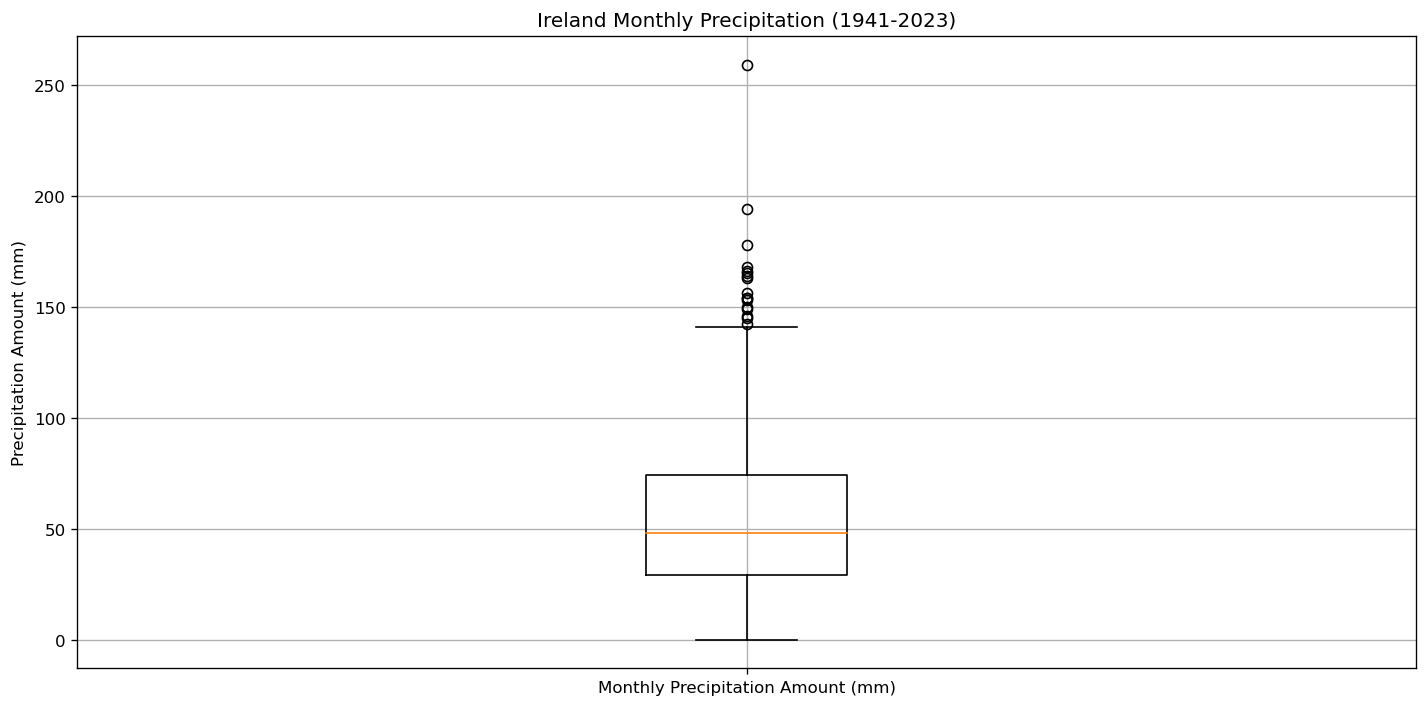

In [27]:
plt.figure(figsize=(12,6))
plt.boxplot(df['Precipitation_Amount'], labels=['Monthly Precipitation Amount (mm)'])

plt.ylabel('Precipitation Amount (mm)')
plt.title('Ireland Monthly Precipitation (1941-2023)')

plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
#Checking the description of data in our dataframe
df.describe()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,1981.166147,6.484943,53.791277,13.298027,13.149533,9.471443
std,23.848870,3.462380,34.935061,10.423639,6.335268,5.036041
min,1941.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.000000,3.000000,29.000000,7.000000,10.000000,6.000000
50%,1981.000000,6.000000,48.000000,11.000000,14.000000,10.000000
75%,2002.000000,9.500000,74.000000,18.000000,17.500000,13.000000
max,2023.000000,12.000000,259.000000,80.000000,29.000000,24.000000


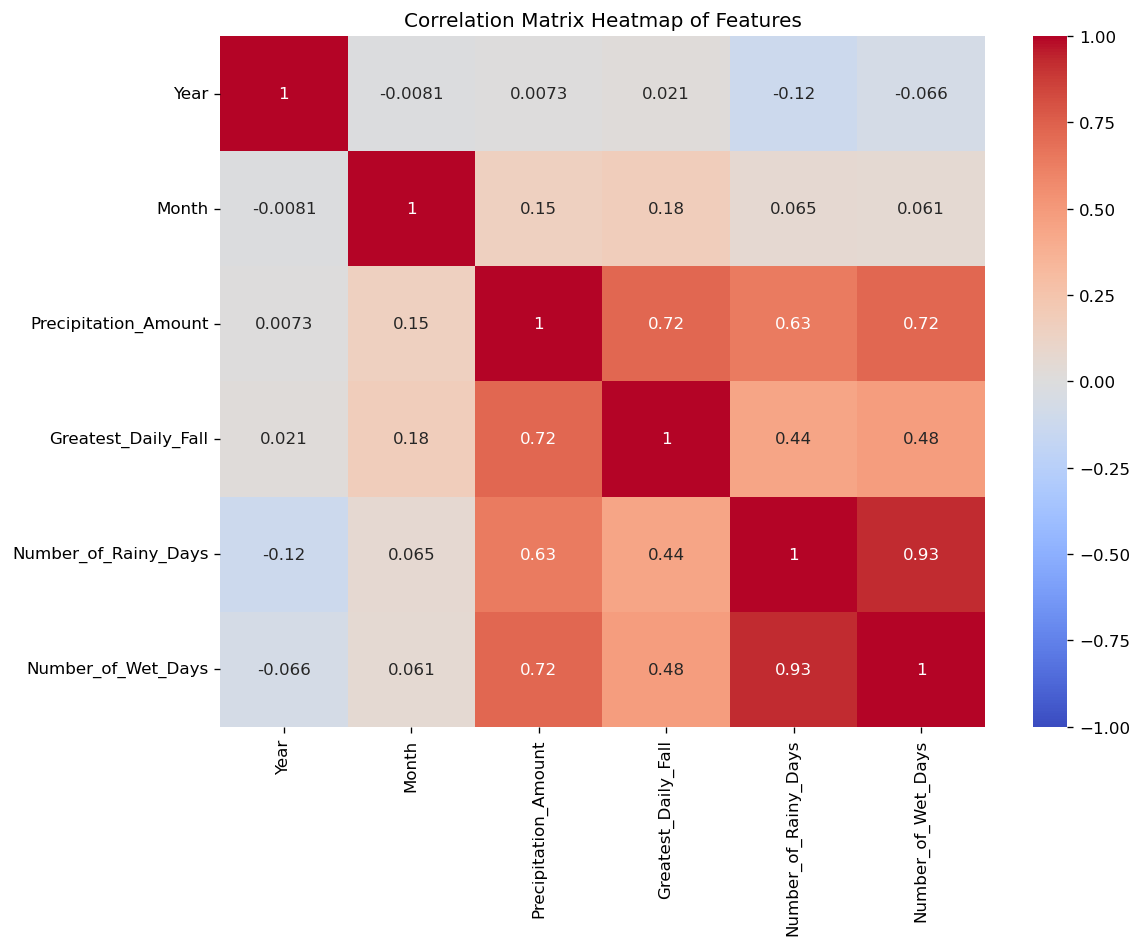

In [29]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Features')
plt.tight_layout()
plt.show()

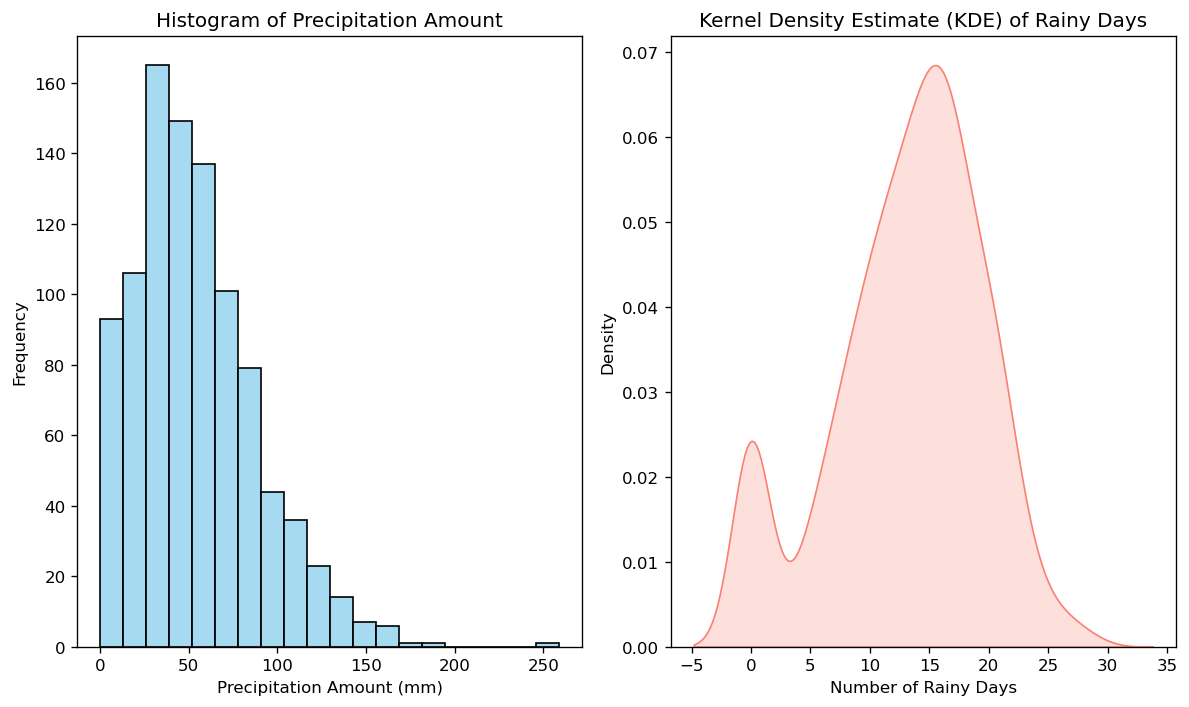

In [30]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Precipitation_Amount'], bins=20, kde=False, color='skyblue')
plt.xlabel('Precipitation Amount (mm)')
plt.ylabel('Frequency')
plt.title('Histogram of Precipitation Amount')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Number_of_Rainy_Days'], shade=True, color='salmon')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of Rainy Days')

plt.tight_layout()
plt.show()

In [31]:
df['Year_Month'] = df['Year'].astype(str) + '-' + df['Month'].astype(str)

max_rain_per_year = df.groupby('Year')['Precipitation_Amount'].idxmax()

max_rain_months = df.loc[max_rain_per_year, ['Year', 'Month', 'Precipitation_Amount']]

max_rain_months.reset_index(drop=True, inplace=True)


In [32]:
max_rain_months.to_csv('max_rain_months.csv', index=False)

In [33]:
max_rain_months.head(5)

,Year,Month,Precipitation_Amount
0,1941,1,112
1,1942,9,95
2,1943,1,120
3,1944,9,138
4,1945,7,75


In [34]:
max_rain_months.shape

(83, 3)

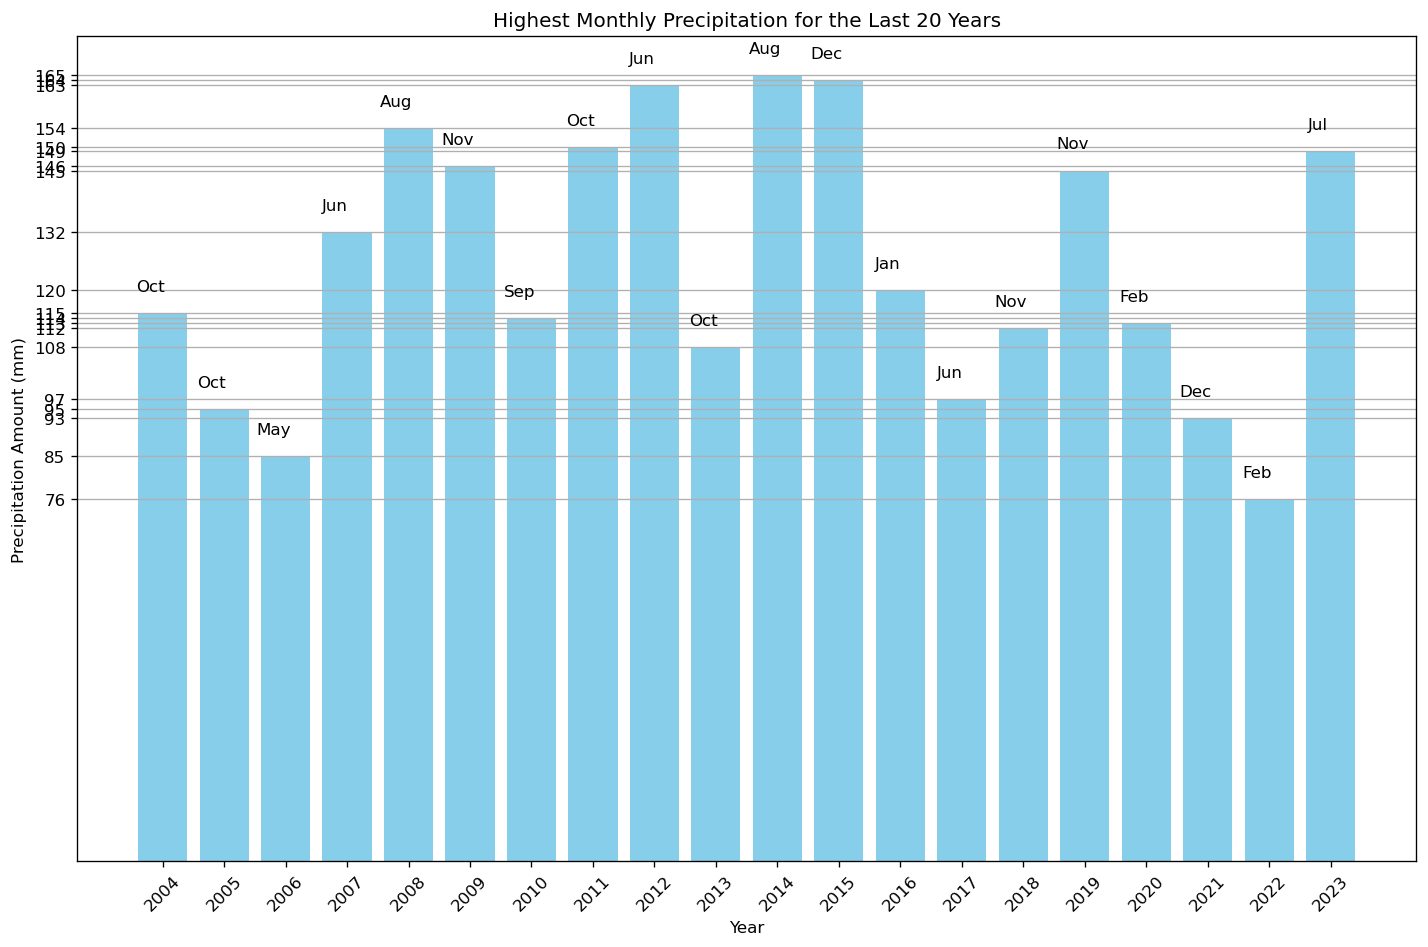

In [35]:
dfm = pd.read_csv('max_rain_months.csv')
dfm_last_20_years = dfm[dfm['Year'] >= 2004]

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

dfm_last_20_years['Month'] = dfm_last_20_years['Month'].apply(lambda x: month_names[int(x) - 1])

max_rain_months = dfm_last_20_years.groupby('Year')['Month'].first().reset_index()

plt.figure(figsize=(12,8))

bars = plt.bar(dfm_last_20_years['Year'].astype(str), dfm_last_20_years['Precipitation_Amount'], color='skyblue')

for i, bar in enumerate(bars):
    if max_rain_months['Month'].iloc[i] in month_names:
        month_idx = month_names.index(max_rain_months['Month'].iloc[i])
        month_abbr = calendar.month_abbr[month_idx + 1]
        plt.text(bar.get_x() + bar.get_width()/2 - 0.2, bar.get_height() + 4,
                 month_abbr, ha='center', va='bottom', color='black', fontsize=10)

plt.xlabel('Year')
plt.ylabel('Precipitation Amount (mm)')
plt.title('Highest Monthly Precipitation for the Last 20 Years')
plt.xticks(rotation=45)
plt.yticks(dfm_last_20_years['Precipitation_Amount'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split


In [37]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor

In [38]:
df.head()

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month
0,1941,1,112,13,18,18,1941-01-01,1941-1
1,1941,2,69,13,22,15,1941-02-01,1941-2
2,1941,3,111,50,21,13,1941-03-01,1941-3
3,1941,4,68,16,15,12,1941-04-01,1941-4
4,1941,5,66,20,13,10,1941-05-01,1941-5


In [39]:
import datetime

df['date'] = pd.to_datetime(df['date'])

# "Mon Apr 06 1941" formatında yeni bir sütun oluşturma
df['new_date'] = df['date'].dt.strftime('%a %b %d %Y')

# Veriyi gösterme
print(df)

     Year  Month  Precipitation_Amount  Greatest_Daily_Fall  \
0    1941      1                   112                   13   
1    1941      2                    69                   13   
2    1941      3                   111                   50   
3    1941      4                    68                   16   
4    1941      5                    66                   20   
..    ...    ...                   ...                  ...   
958  2023      5                    42                   16   
959  2023      6                    31                    8   
960  2023      7                   149                   25   
961  2023      8                   118                   35   
962  2023      9                   104                   18   

     Number_of_Rainy_Days  Number_of_Wet_Days       date Year_Month  \
0                      18                  18 1941-01-01     1941-1   
1                      22                  15 1941-02-01     1941-2   
2                      21     

In [40]:
df.head(2)

,Year,Month,Precipitation_Amount,Greatest_Daily_Fall,Number_of_Rainy_Days,Number_of_Wet_Days,date,Year_Month,new_date
0,1941,1,112,13,18,18,1941-01-01,1941-1,Wed Jan 01 1941
1,1941,2,69,13,22,15,1941-02-01,1941-2,Sat Feb 01 1941


In [41]:
df2= df.drop(["Year","Month","Greatest_Daily_Fall", "Number_of_Rainy_Days","Number_of_Wet_Days","date","Year_Month" ],axis=1)

In [42]:
df2.head(2)

,Precipitation_Amount,new_date
0,112,Wed Jan 01 1941
1,69,Sat Feb 01 1941


array([[<Axes: title={'center': 'Precipitation_Amount'}>]], dtype=object)

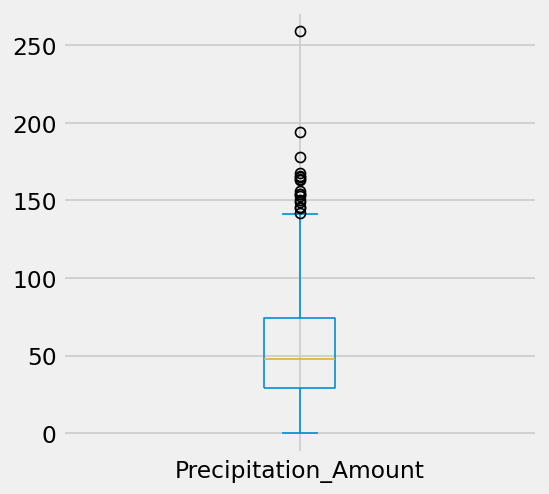

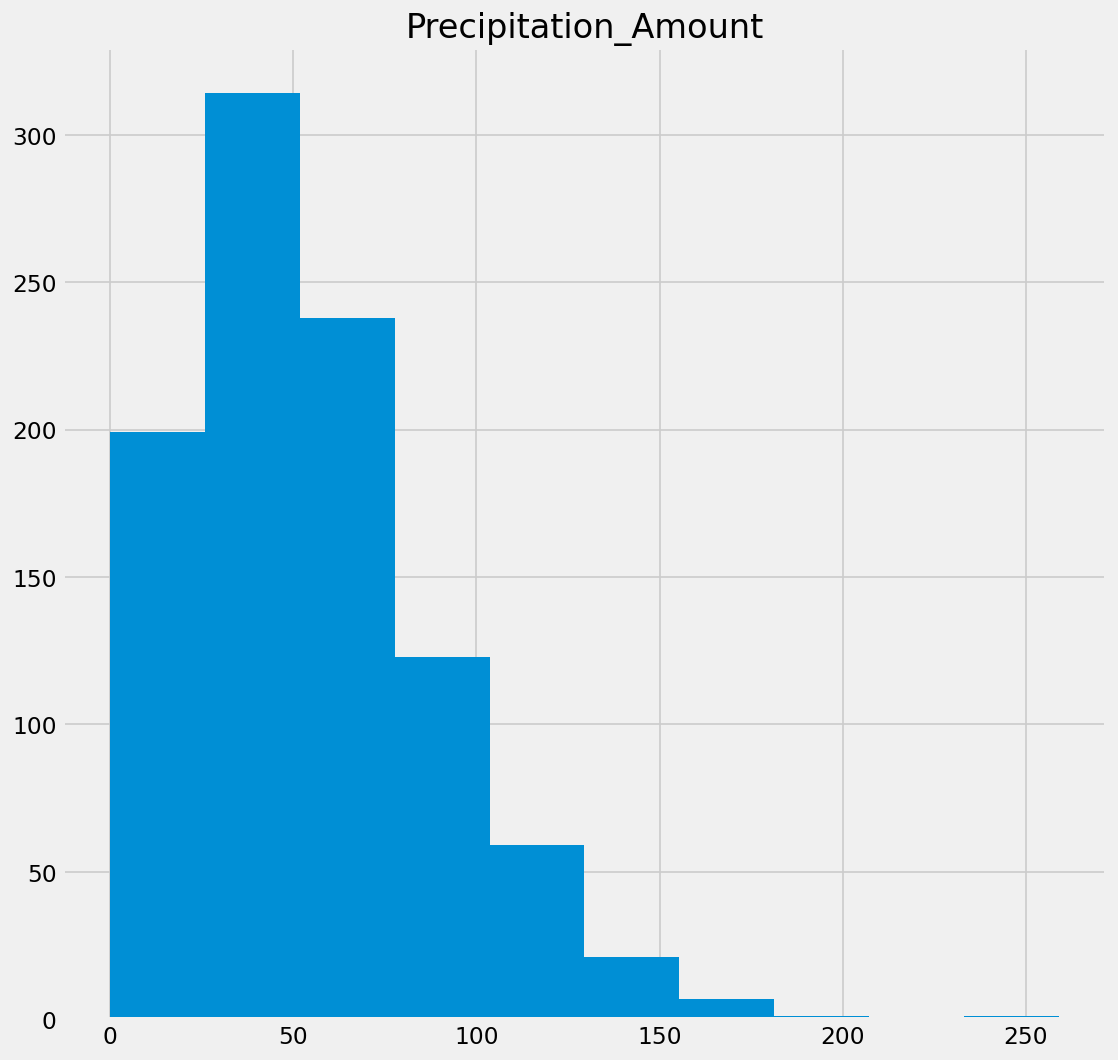

In [43]:
#Check the columns of the dataframe
df2.columns

# Check the datatypes of the columns
df2.dtypes

# Check the missing values
df2.isnull().sum()

# Check the unique values of the columns
df2.nunique()

# Check the value counts of the columns
df2['Precipitation_Amount'].value_counts()

# Check the percentage of the value counts of the columns
df2['Precipitation_Amount'].value_counts(normalize=True)

# Check the summary statistics of the dataframe
df2.describe(include='all')

# Check the outliers
df2.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

# Check the distribution of the columns
df2.hist(figsize=(10,10))


In [44]:
# Convert the full_date column to datetime datatype
df2['new_date'] = pd.to_datetime(df2['new_date'])

In [45]:
# Print the rows of the dataframe where the Precipitation_Amount is Null
df2[df2['Precipitation_Amount'].isnull()]      

,Precipitation_Amount,new_date


In [46]:
# Group the dataframe by full_date and calculate the mean of the sentiment_score
df2 = df2.groupby('new_date').mean().reset_index()

In [47]:
# Check the dataframe
print(df2.head(3))
print(df2.tail(3))

    new_date  Precipitation_Amount
0 1941-01-01                 112.0
1 1941-02-01                  69.0
2 1941-03-01                 111.0
      new_date  Precipitation_Amount
960 2023-07-01                 149.0
961 2023-08-01                 118.0
962 2023-09-01                 104.0


In [48]:
# Find the missing dates in the dataframe and insert them, leaving the sentiment_score column as Null
idx = pd.date_range('1941-01-01', '2023-09-01')
df2 = df2.set_index('new_date').reindex(idx).rename_axis('new_date').reset_index()

# Check the dataframe
print(df2.head(3))

    new_date  Precipitation_Amount
0 1941-01-01                 112.0
1 1941-01-02                   NaN
2 1941-01-03                   NaN


In [49]:
# Fill in the null values using interpolation
df2['Precipitation_Amount'] = df2['Precipitation_Amount'].interpolate(method='linear')

Shape: 
(30194, 2)

Columns: 
Index(['new_date', 'Precipitation_Amount'], dtype='object')

Data Types: 
new_date                datetime64[ns]
Precipitation_Amount           float64
dtype: object

Missing Values: 
new_date                0
Precipitation_Amount    0
dtype: int64

Unique Values: 
new_date                30194
Precipitation_Amount    10665
dtype: int64

Value Counts: 
0.000000      755
33.000000      76
38.000000      72
34.000000      69
24.000000      62
             ... 
140.933333      1
141.200000      1
141.466667      1
141.733333      1
105.806452      1
Name: Precipitation_Amount, Length: 10665, dtype: int64

Percentage of Value Counts: 
0.000000      0.025005
33.000000     0.002517
38.000000     0.002385
34.000000     0.002285
24.000000     0.002053
                ...   
140.933333    0.000033
141.200000    0.000033
141.466667    0.000033
141.733333    0.000033
105.806452    0.000033
Name: Precipitation_Amount, Length: 10665, dtype: float64

Summary Statistics:

Precipitation_Amount    Axes(0.08,0.511818;0.395455x0.368182)
dtype: object

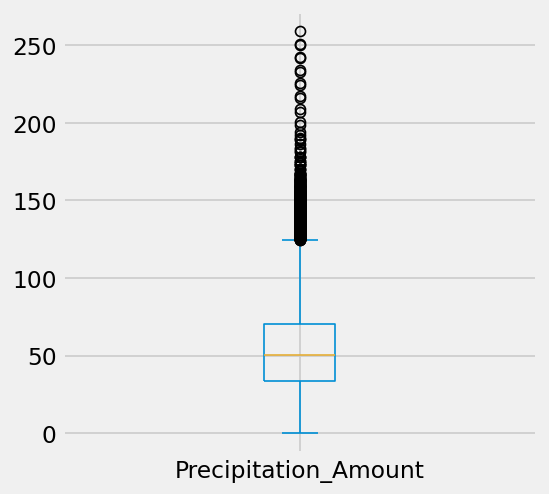

In [50]:
# Perform EDA on the new dataframe
print("Shape: ")
print(df2.shape)
print("\n" + "Columns: ")
print(df2.columns)
print("\n" + "Data Types: ")
print(df2.dtypes)
print("\n" + "Missing Values: ")
print(df2.isnull().sum())
print("\n" + "Unique Values: ")
print(df2.nunique())
print("\n" + "Value Counts: ")
print(df2['Precipitation_Amount'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df2['Precipitation_Amount'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df2.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))

In [51]:
# Describe the df
df2.describe(include='all')

,new_date,Precipitation_Amount
count,30194,30194.000000
unique,30194,NaN
top,1941-01-01 00:00:00,NaN
freq,1,NaN
first,1941-01-01 00:00:00,NaN
last,2023-09-01 00:00:00,NaN
mean,NaN,53.848745
std,NaN,29.125950
min,NaN,0.000000
25%,NaN,33.548387


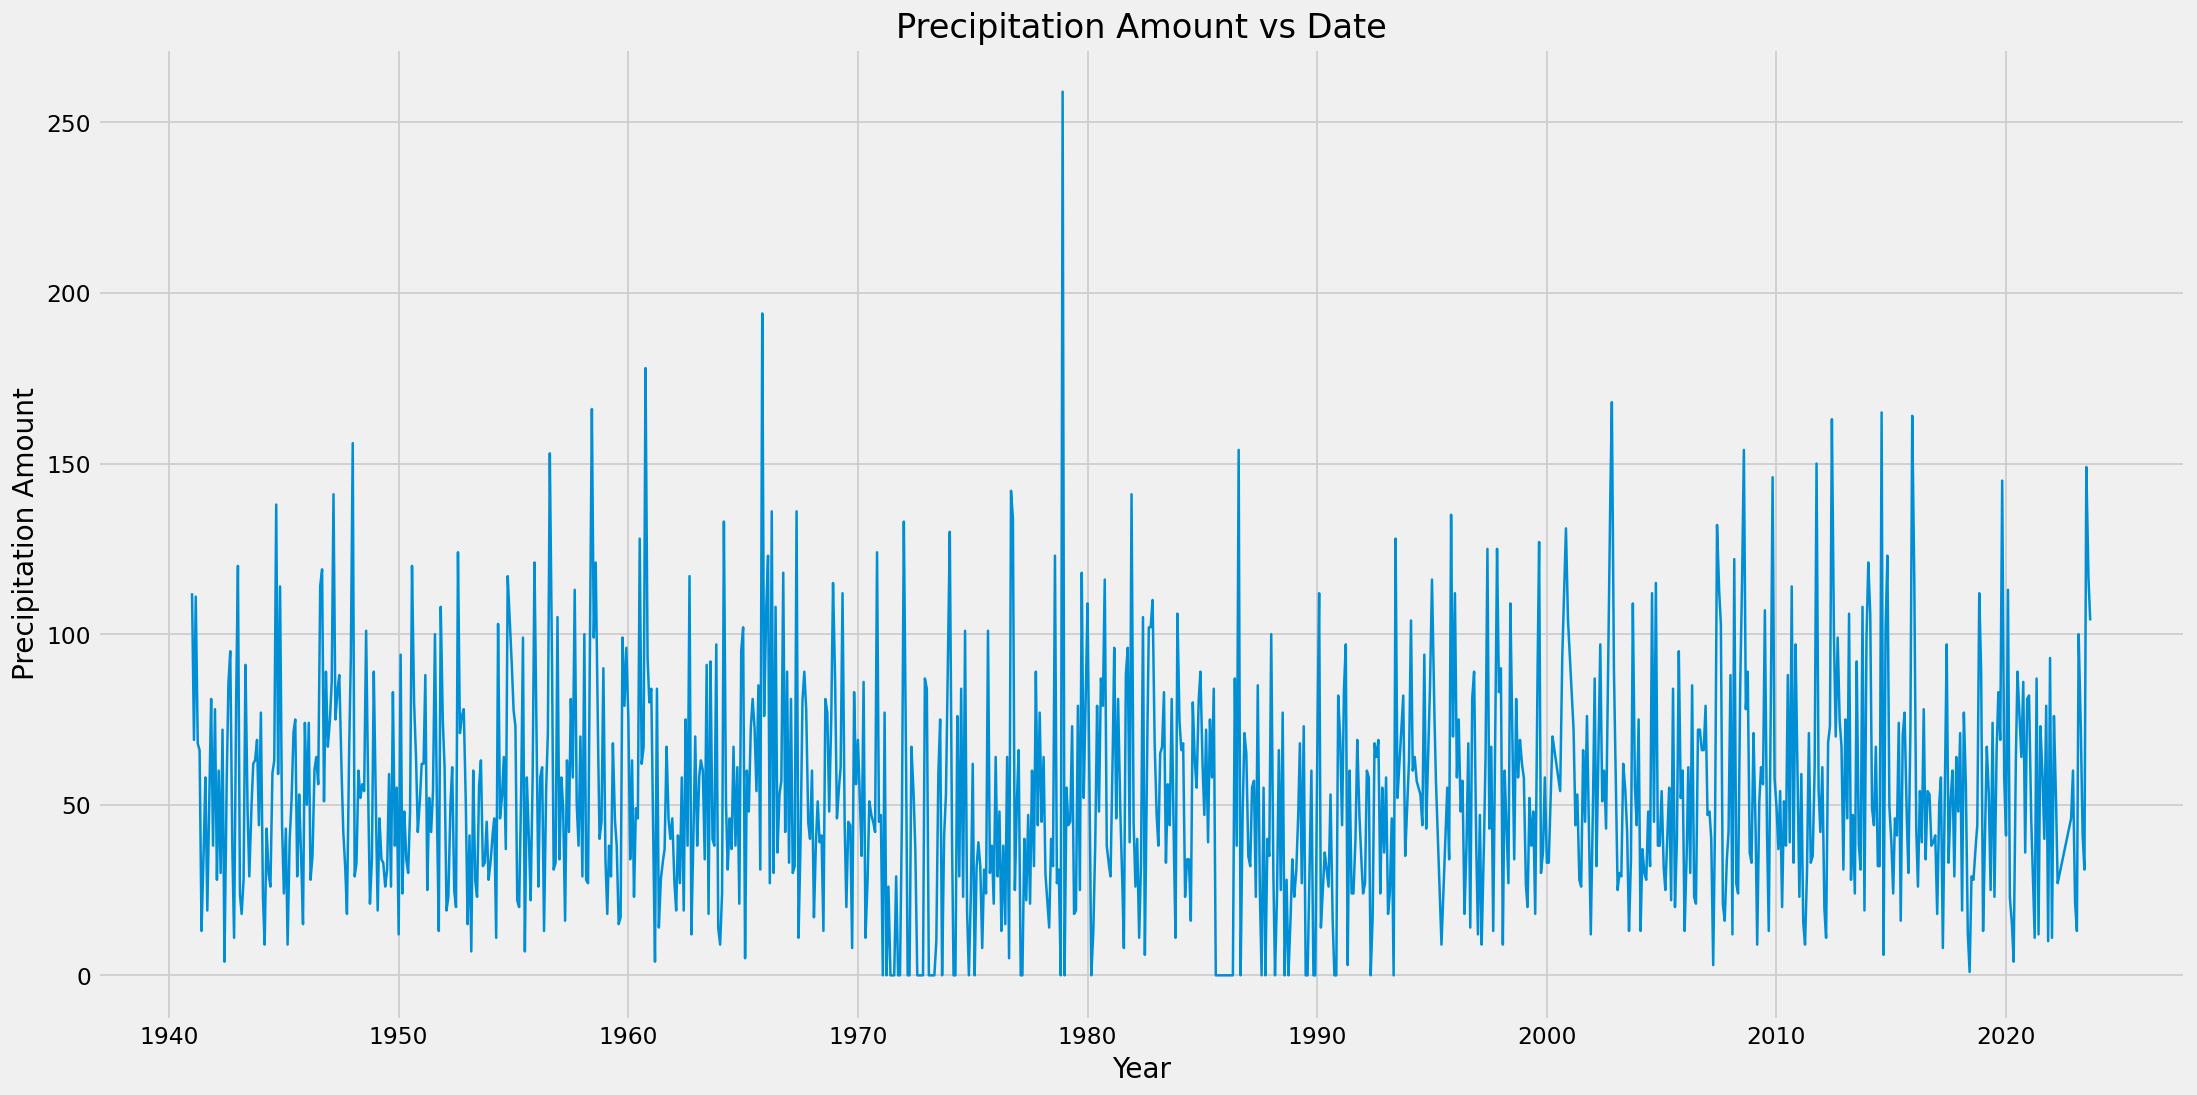

In [52]:
# Plot the sentiment_score
plt.figure(figsize=(20,10))
plt.plot(df2['new_date'], df2['Precipitation_Amount'])
plt.xlabel('Year')
plt.ylabel('Precipitation Amount')
plt.title('Precipitation Amount vs Date')
plt.show()

In [53]:
# Create a function to check the stationarity of the time series
def check_stationarity(timeseries):
    
    # Calculate the rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # Plot the rolling statistics
    plt.figure(figsize=(20,10))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.xlabel('Date')
    plt.ylabel('Precipitation Amount')
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()
    
    # Perform the Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    df2test = adfuller(timeseries, autolag='AIC')
    df2output = pd.Series(df2test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in df2test[4].items():
        df2output['Critical Value (%s)'%key] = value
    print(df2output)
    
    # Print whether the time series is stationary or not, based on the p-value
    if df2output[1] <= 0.05:
        print('The time series is stationary.')
    else:
        print('The time series is not stationary.')

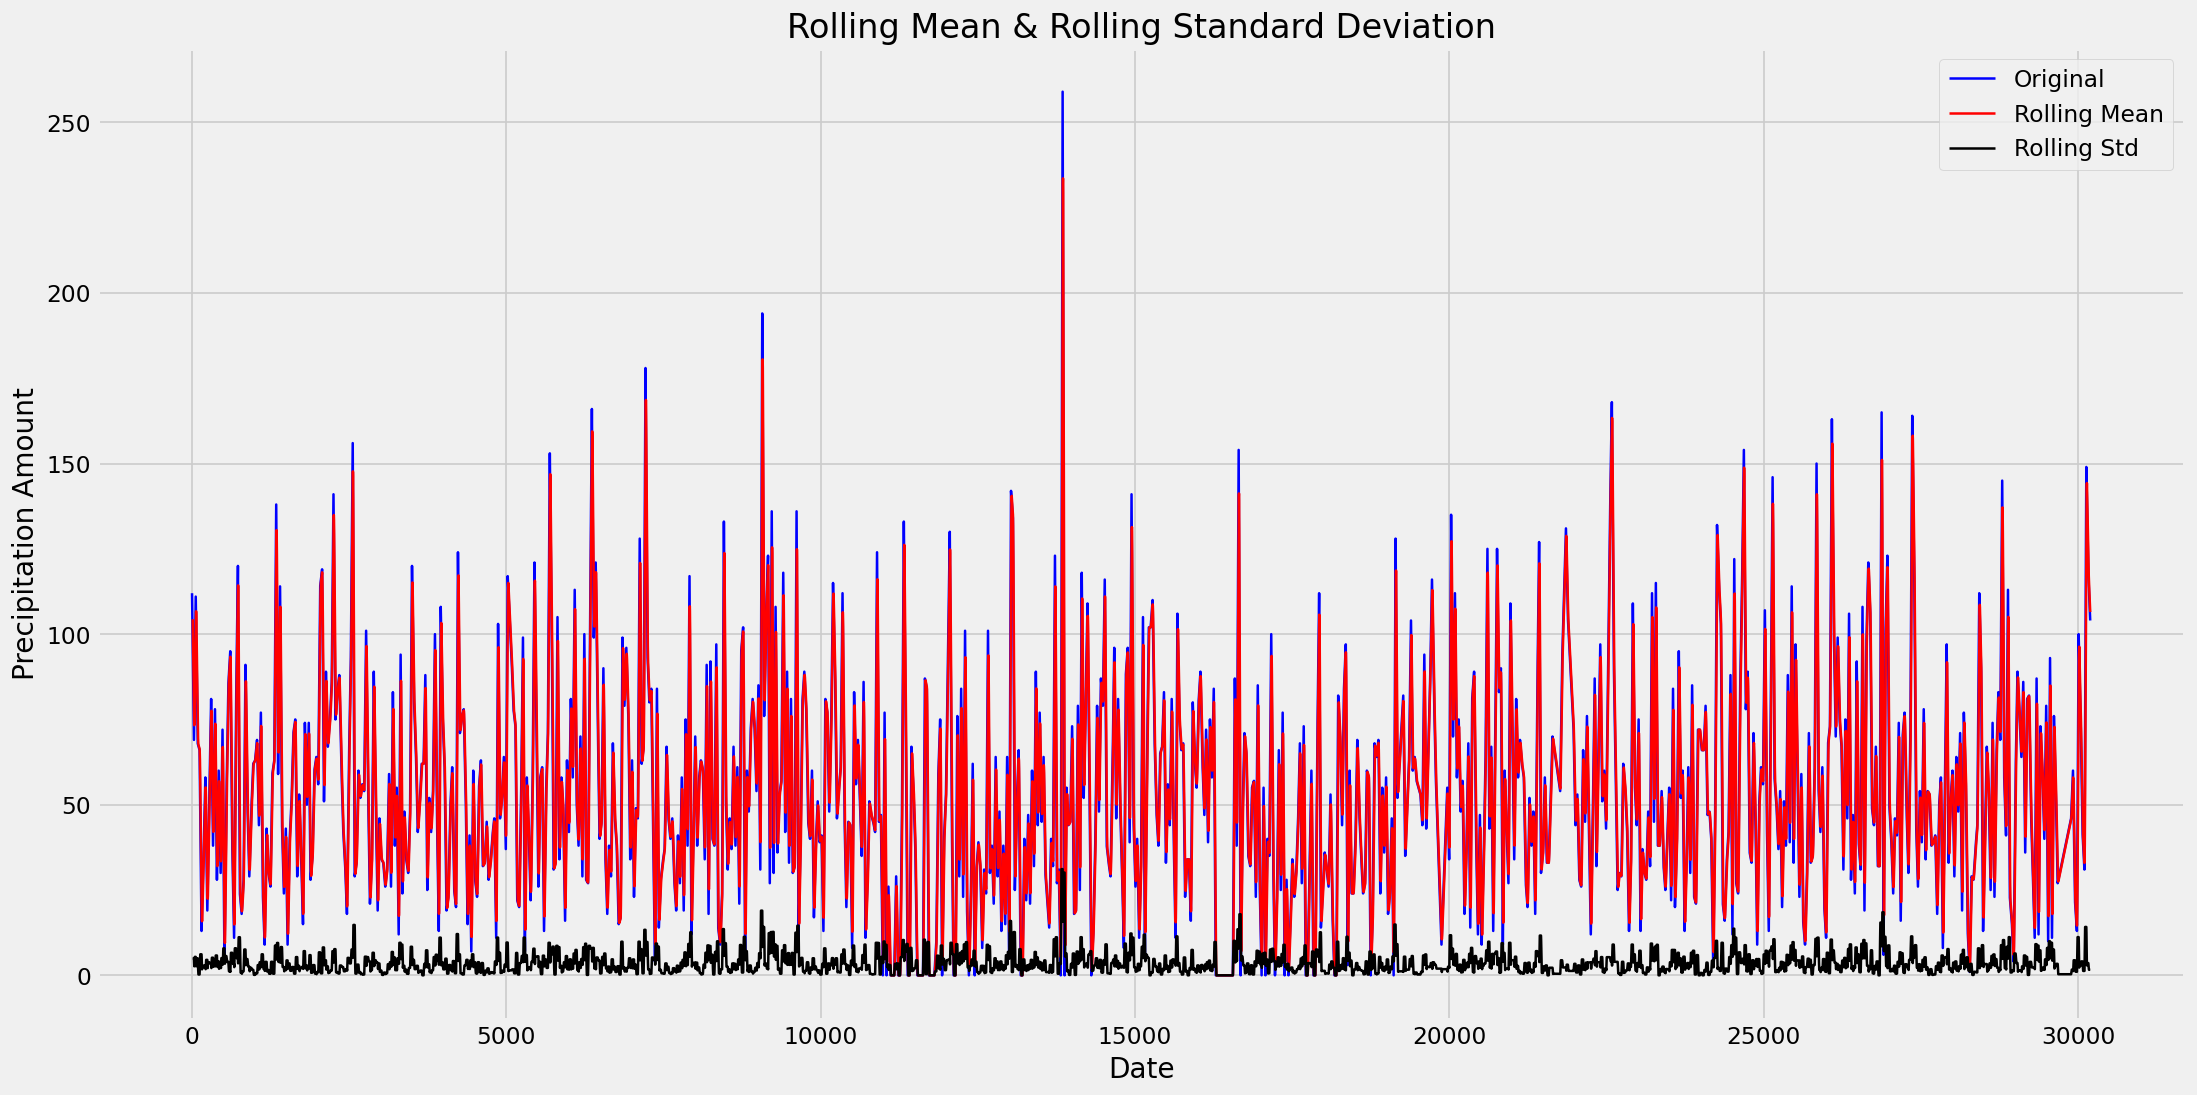

Results of Dickey-Fuller Test:
Test Statistic                -1.503038e+01
p-value                        9.922827e-28
#Lags Used                     5.100000e+01
Number of Observations Used    3.014200e+04
Critical Value (1%)           -3.430567e+00
Critical Value (5%)           -2.861636e+00
Critical Value (10%)          -2.566821e+00
dtype: float64
The time series is stationary.


In [54]:
# Check the stationarity of the time series
check_stationarity(df2['Precipitation_Amount'])

According to the Dickey-Fuller unit root test results, we can conclude that your data set is stationary. This means that the time series exhibits statistically stable behavior and there is no particular trend or fluctuation over time. We can use these results in future modeling and forecasting studies to ensure that the stationarity assumption is met.

In [56]:
# Decompose the time series
# Decomposition is a useful technique to remove the trend and seasonality from a time series, since the timespan is 2.5 months (75 days), the period is 7 days
decomposition = seasonal_decompose(df2['Precipitation_Amount'], period=7)
decomposition_diff = seasonal_decompose(df2['Precipitation_Amount'], period=7)

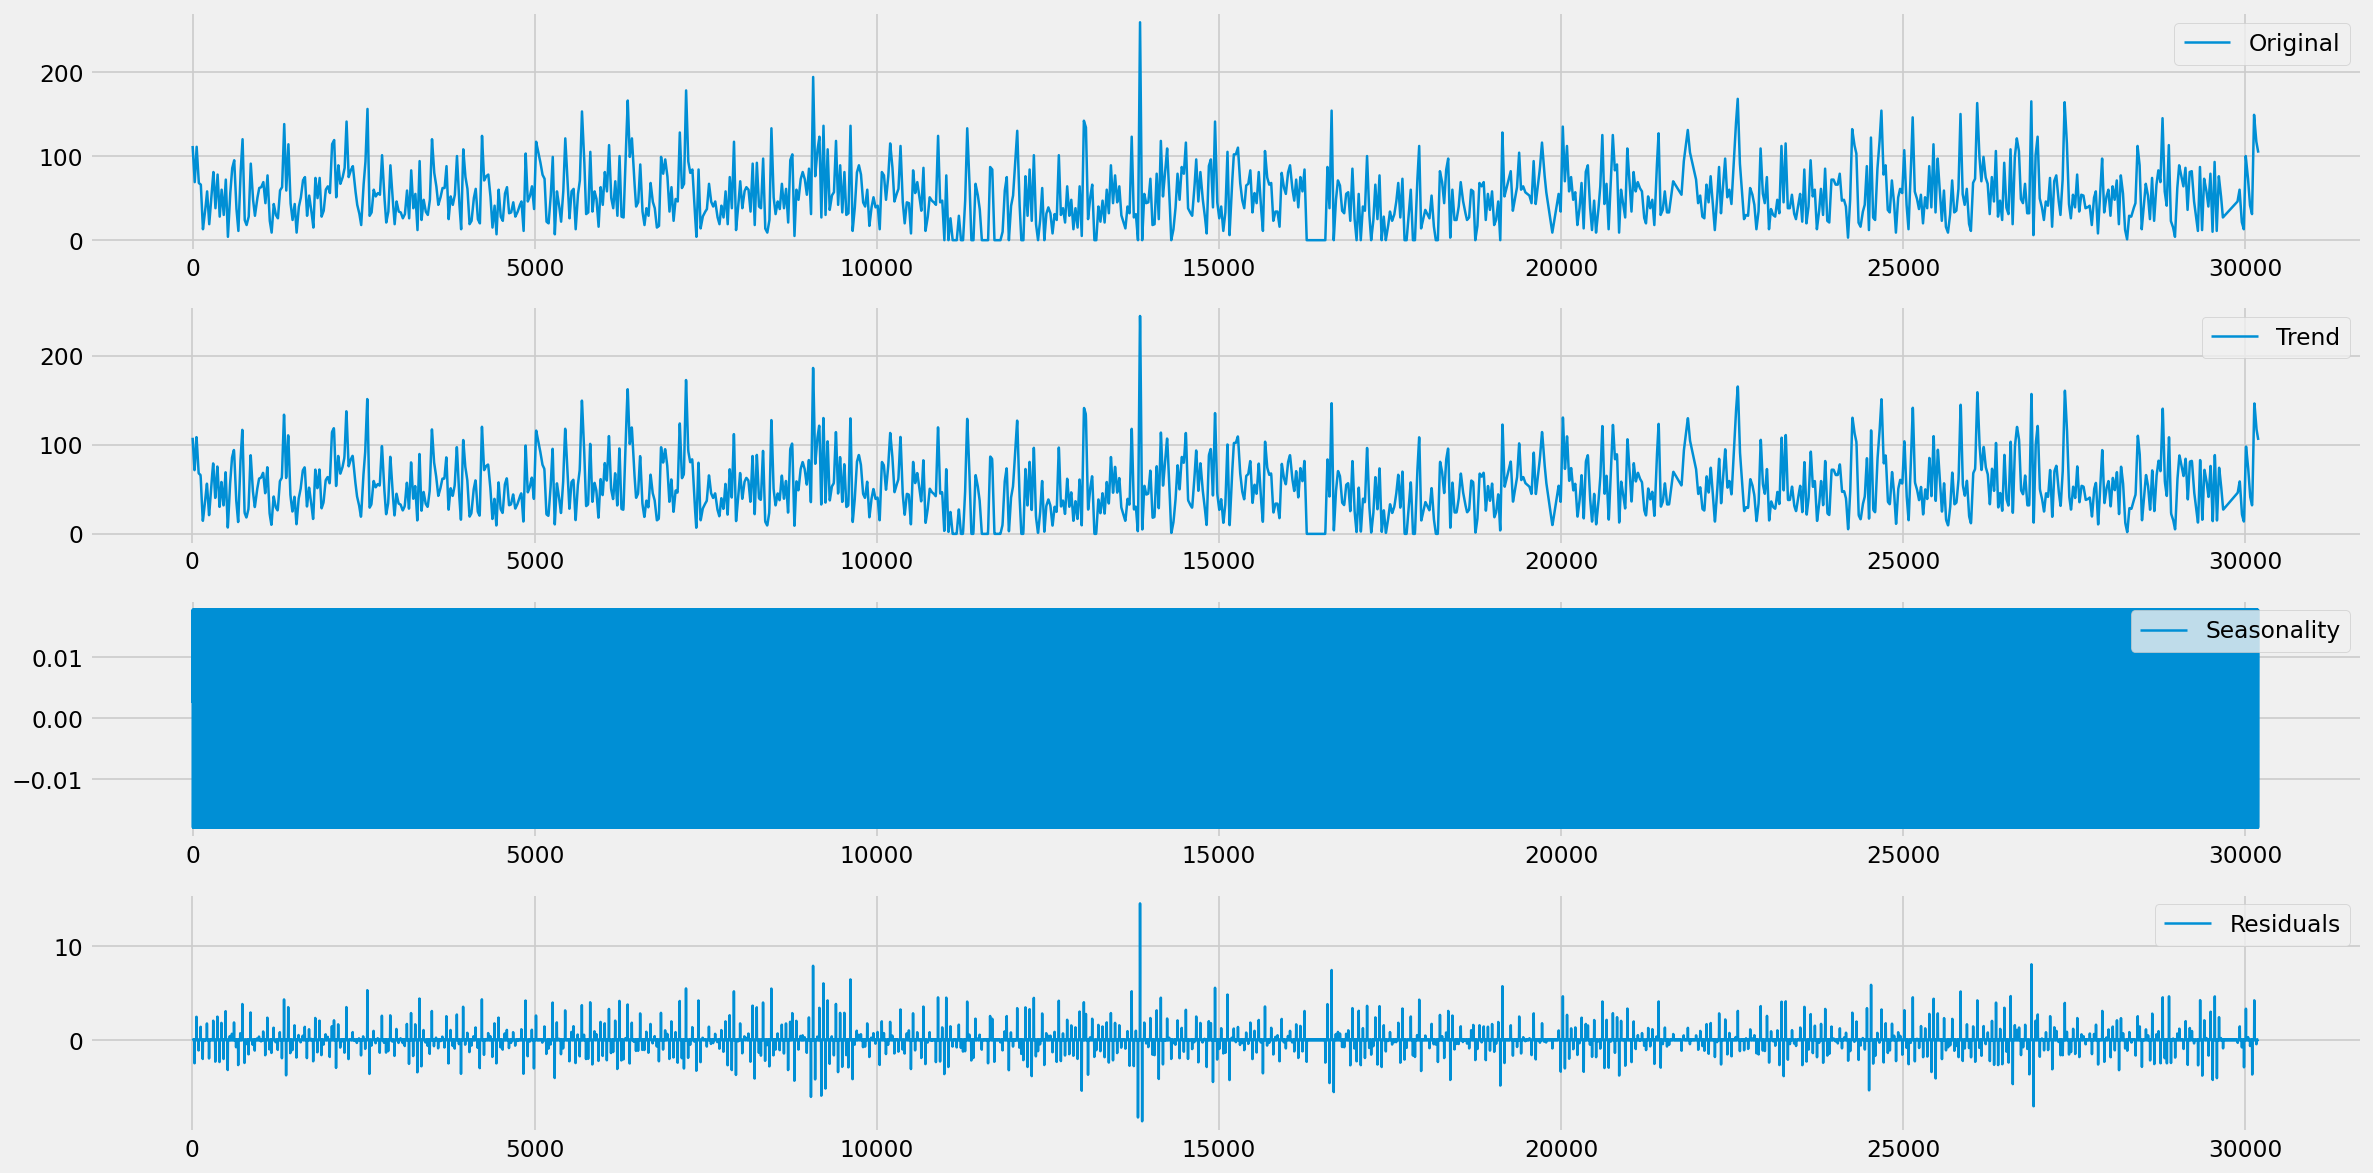

In [57]:
# Plot the original time series, the trend, the seasonality, and the residuals
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(df2['Precipitation_Amount'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [58]:
# Use the decomposed time series to make the time series stationary
df2['Precipitation_Amount_decomposed'] = decomposition.resid
df2['Precipitation_Amount_diff_decomposed'] = decomposition_diff.resid

In [59]:
# Fill any null values with the mean of the column
df2['Precipitation_Amount_decomposed'] = df2['Precipitation_Amount_decomposed'].fillna(df2['Precipitation_Amount_decomposed'].mean())
df2['Precipitation_Amount_diff_decomposed'] = df2['Precipitation_Amount_diff_decomposed'].fillna(df2['Precipitation_Amount_diff_decomposed'].mean())

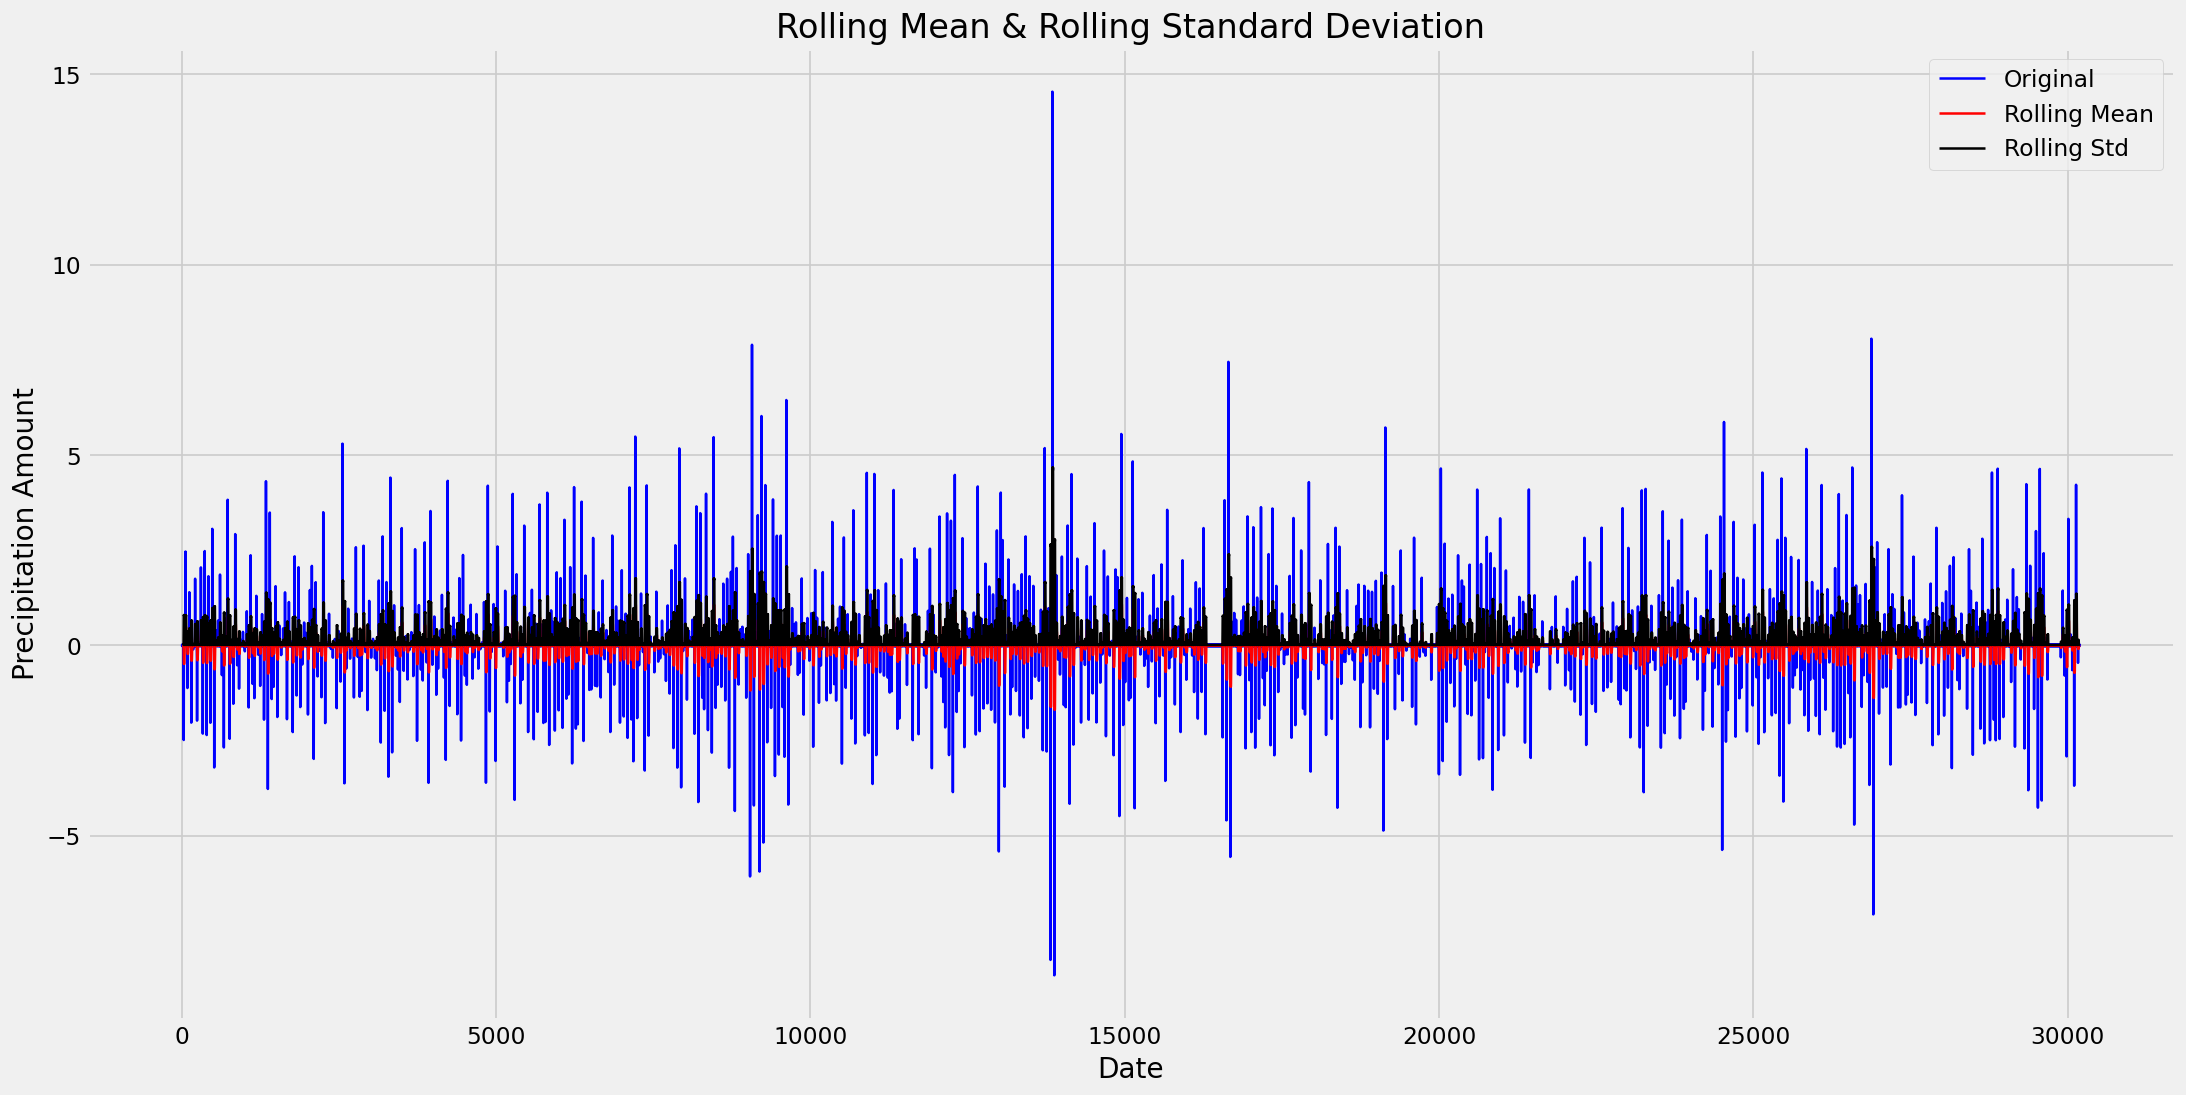

Results of Dickey-Fuller Test:
Test Statistic                   -45.783157
p-value                            0.000000
#Lags Used                        36.000000
Number of Observations Used    30157.000000
Critical Value (1%)               -3.430567
Critical Value (5%)               -2.861636
Critical Value (10%)              -2.566821
dtype: float64
The time series is stationary.


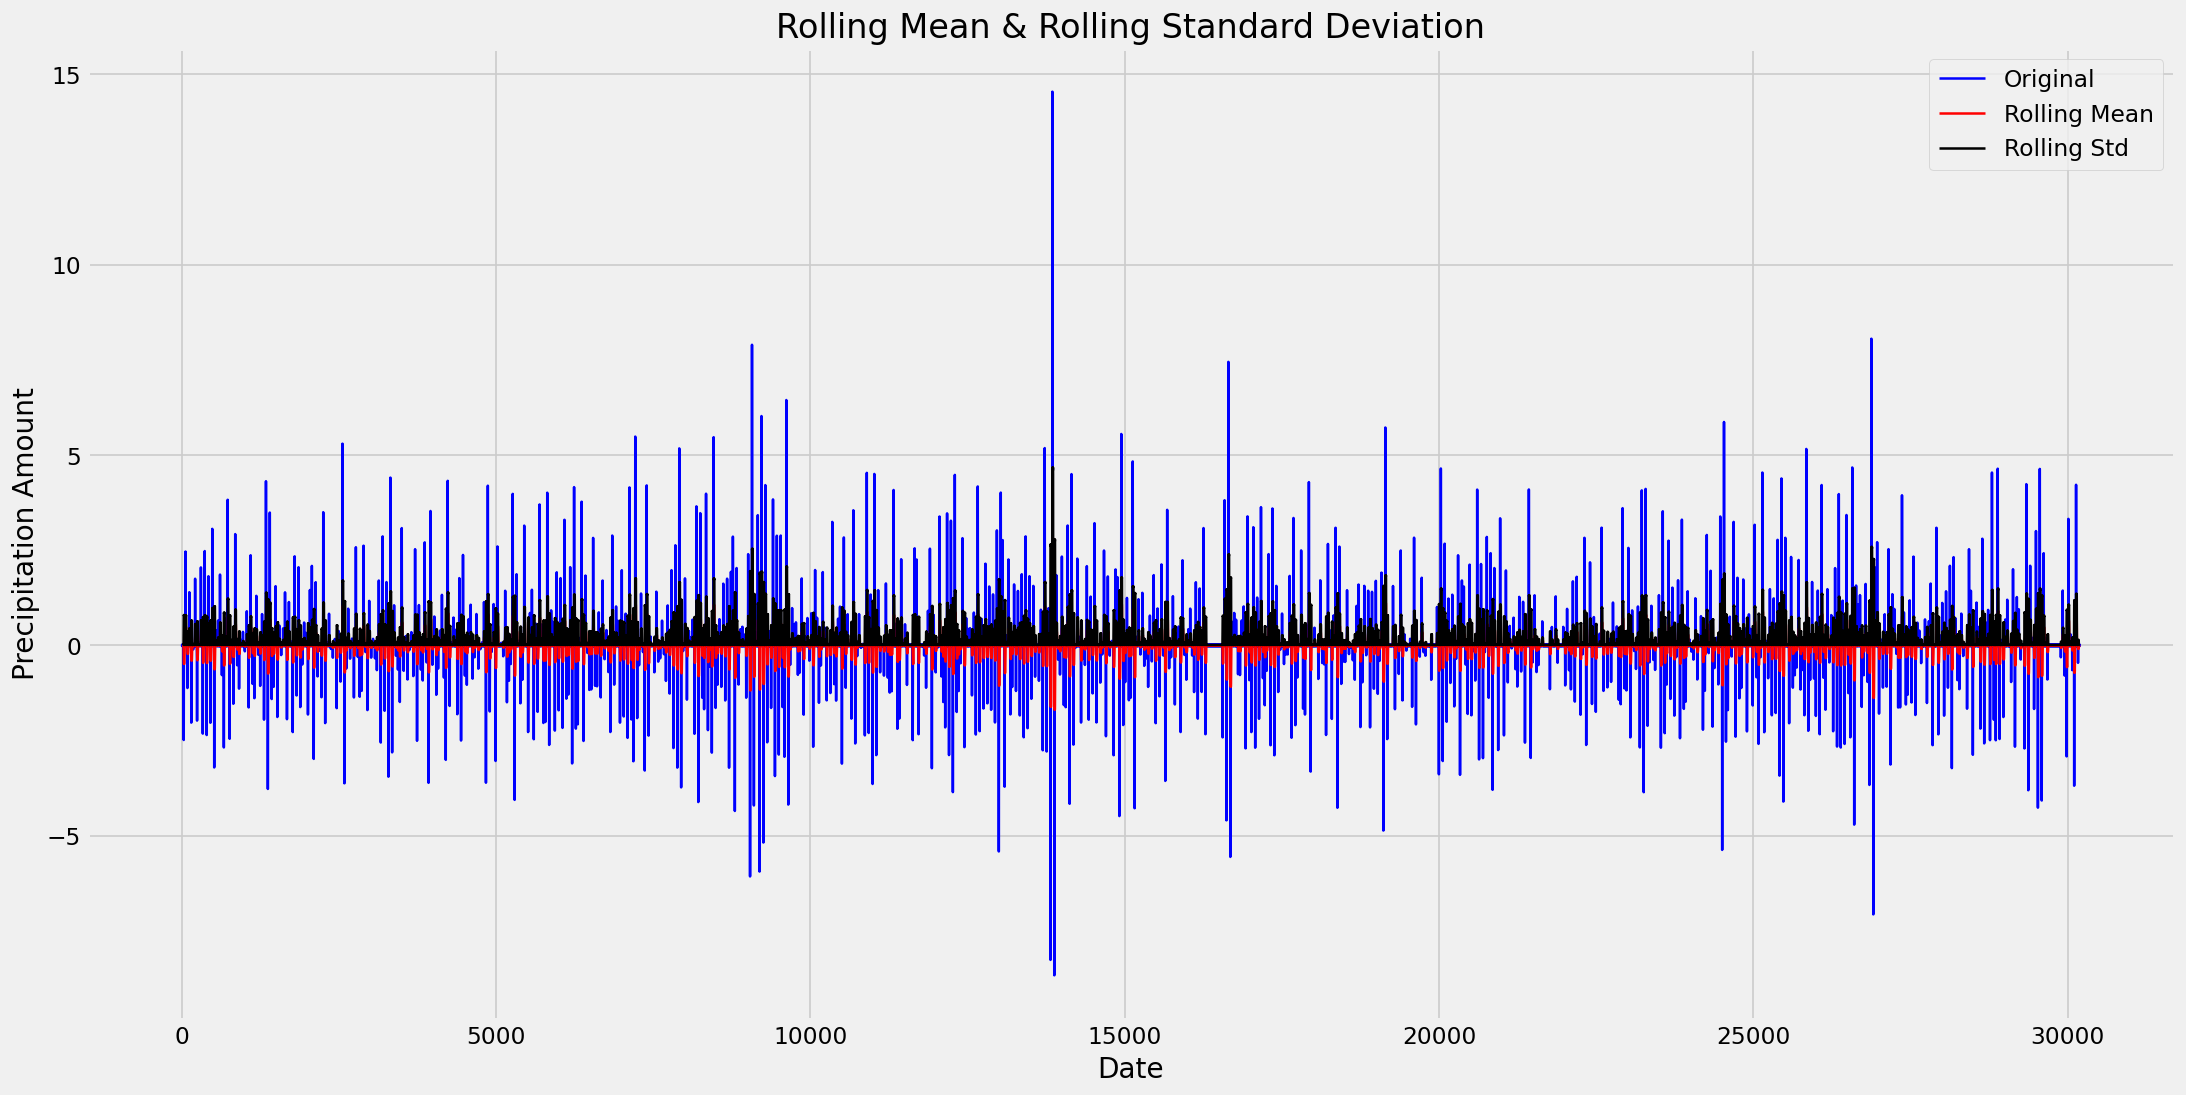

Results of Dickey-Fuller Test:
Test Statistic                   -45.783157
p-value                            0.000000
#Lags Used                        36.000000
Number of Observations Used    30157.000000
Critical Value (1%)               -3.430567
Critical Value (5%)               -2.861636
Critical Value (10%)              -2.566821
dtype: float64
The time series is stationary.


In [60]:
# Out of the 2 stationary time series columns which one is the most stationary?
check_stationarity(df2['Precipitation_Amount_decomposed'])
check_stationarity(df2['Precipitation_Amount_diff_decomposed'])

In [61]:
# Create a fuction to plot the ACF and PACF plots
def plot_acf_pacf(timeseries):
    plt.figure(figsize=(20,10))
    plt.subplot(211)
    plt.plot(acf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Autocorrelation Function')
    plt.subplot(212)
    plt.plot(pacf(timeseries, nlags=20))
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.axhline(y=1.96/np.sqrt(len(timeseries)), linestyle='--', color='gray')
    plt.title('Partial Autocorrelation Function')
    plt.tight_layout()
    plt.show()

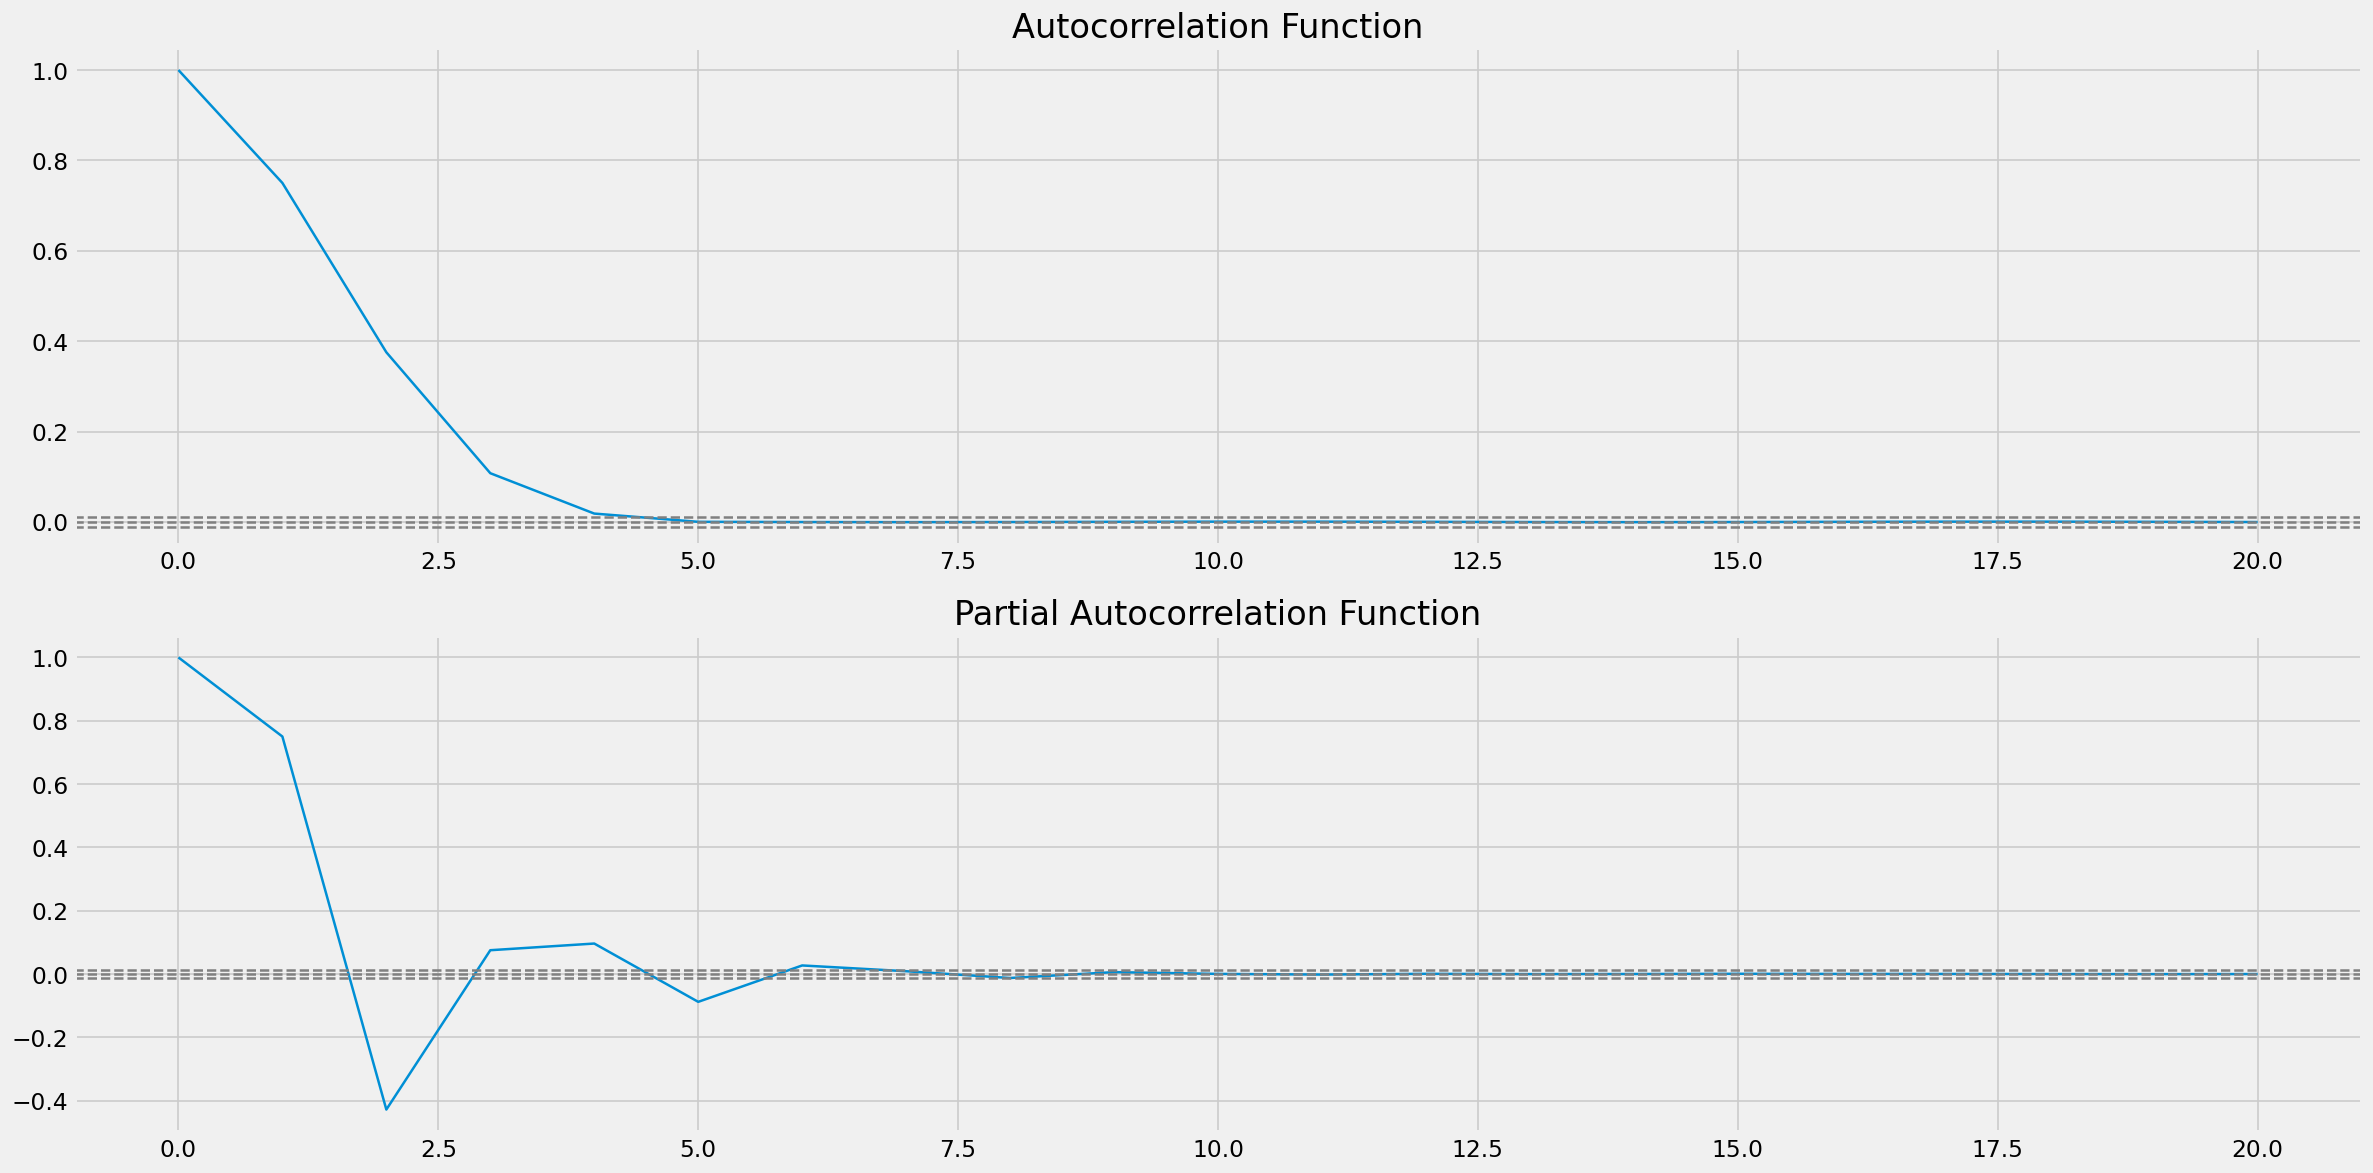

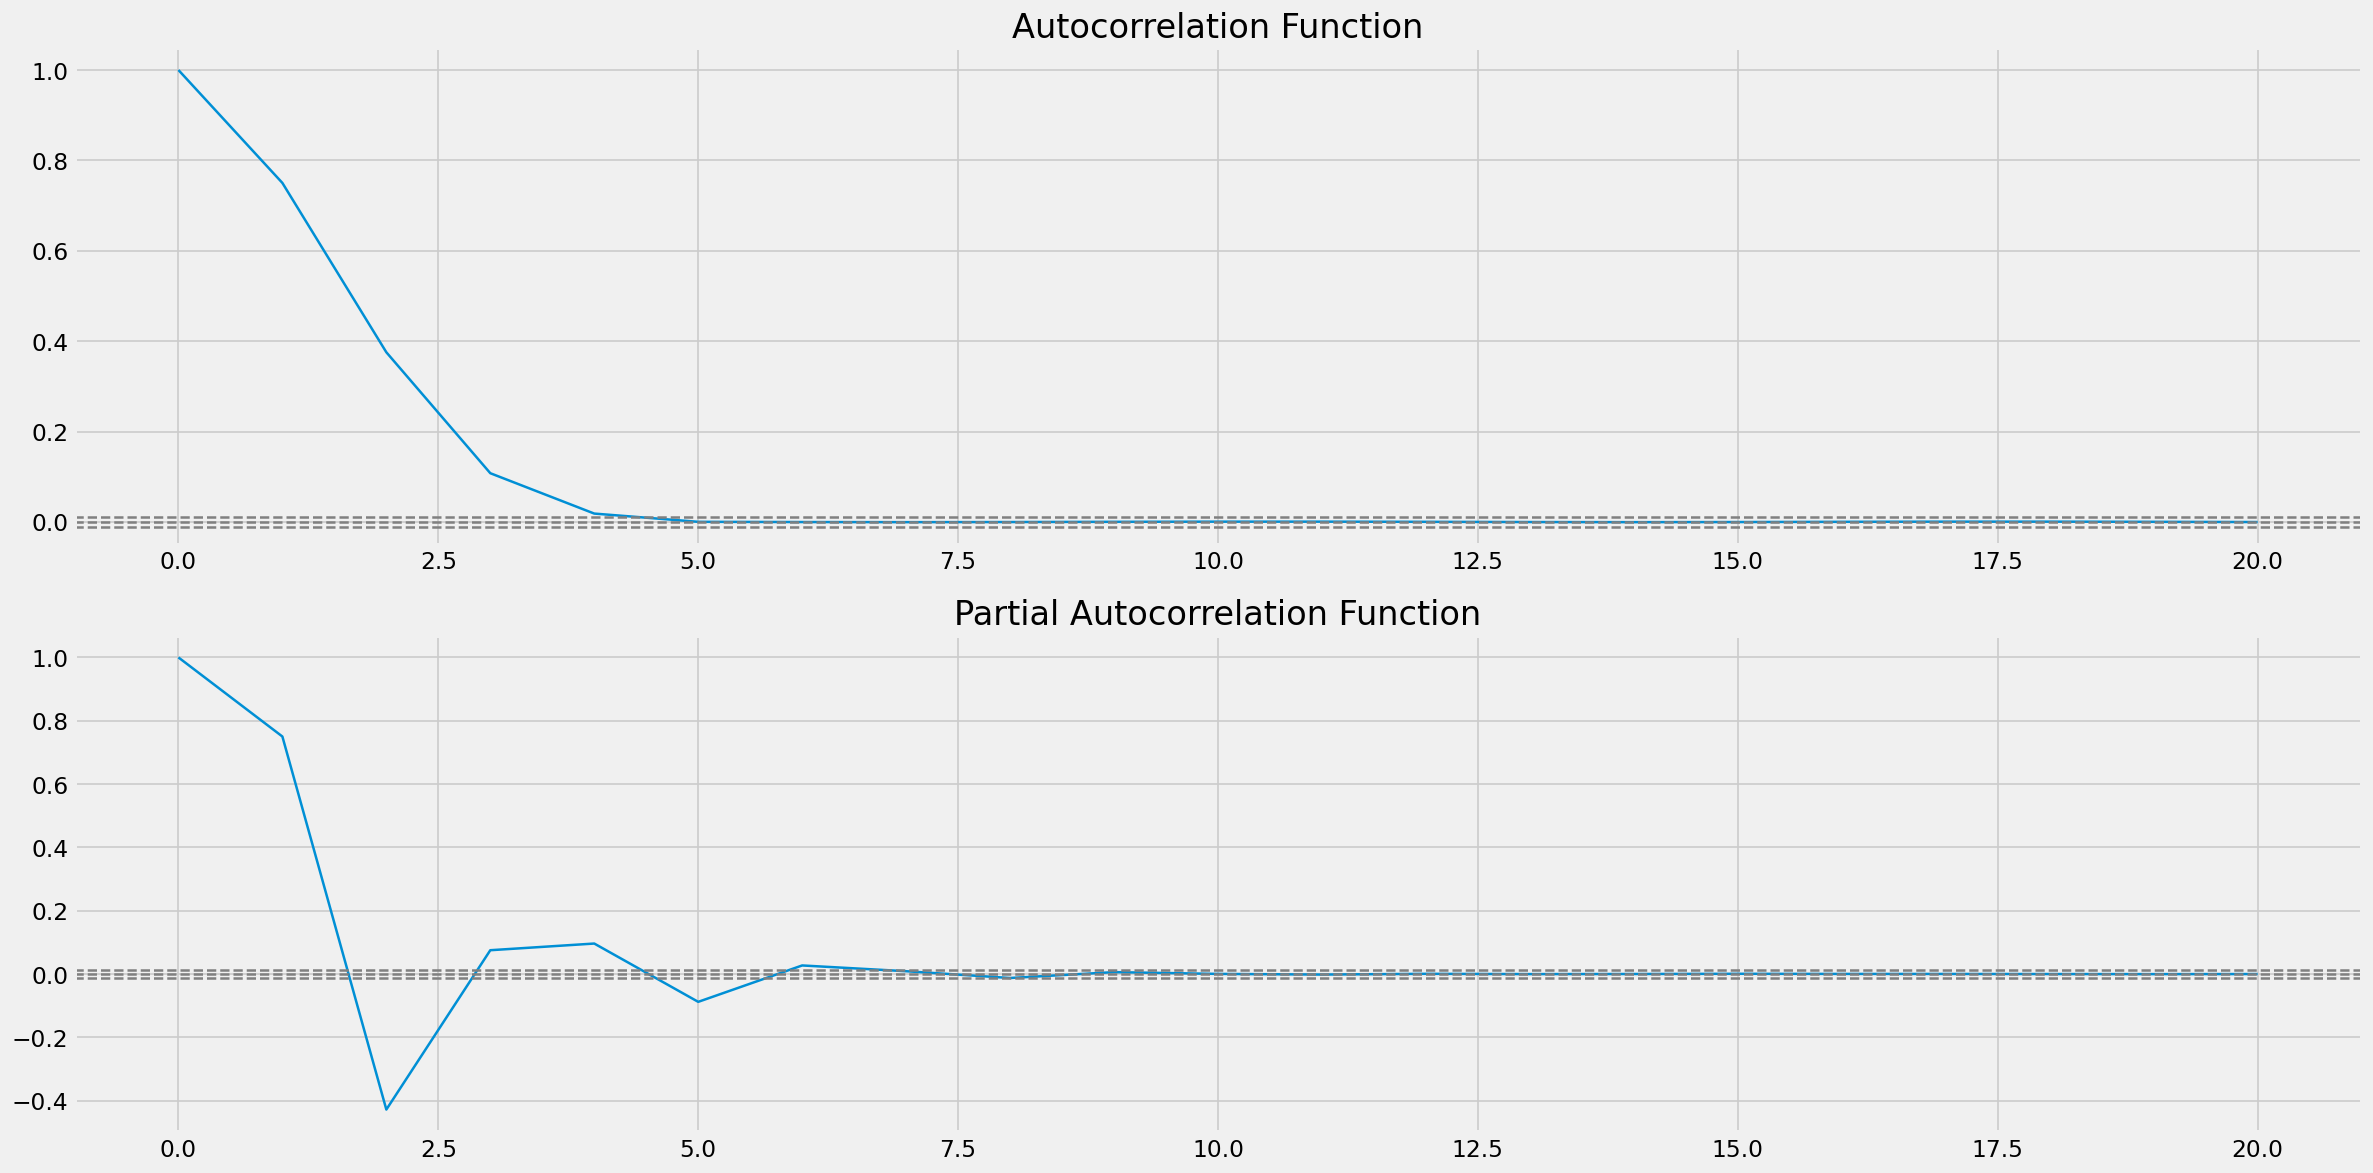

In [62]:
# Plot the ACF and PACF plots for the 3 stationary time series columns
plot_acf_pacf(df2['Precipitation_Amount_decomposed'])
plot_acf_pacf(df2['Precipitation_Amount_diff_decomposed'])

In [63]:
# Print the p-values of the 2 stationary time series columns
print(adfuller(df2['Precipitation_Amount_decomposed'])[1])
print(adfuller(df2['Precipitation_Amount_diff_decomposed'])[1])

0.0
0.0


In [64]:
# We are going to use the Precipitation_Amount_decomposed column for the ARIMA model
df3 = df2[['new_date', 'Precipitation_Amount_decomposed']]

# Set the full_date column as the index
df3.set_index('new_date', inplace=True)

Precipitation_Amount_decomposed    0
dtype: int64

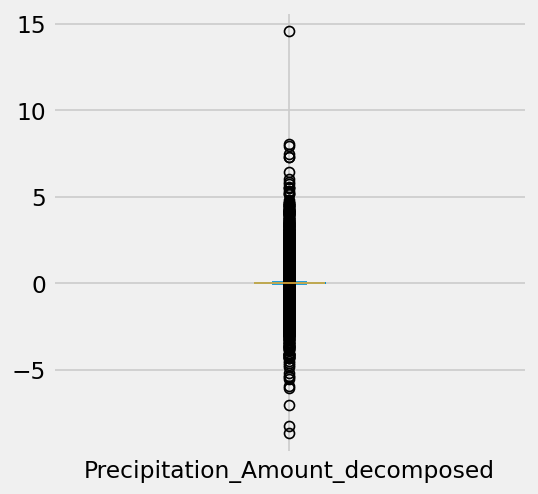

In [65]:
# Check the dataframe for outliers and missing values
df3.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,10))
df3.isnull().sum()

In [66]:
# Normalise the dataframe
scaler = MinMaxScaler()
df3['Precipitation_Amount_decomposed'] = scaler.fit_transform(df3['Precipitation_Amount_decomposed'].values.reshape(-1,1))

In [67]:
# Check the dataframe
print(len(df3))
print(round(len(df3)*.8))
print(len(df3) - round(len(df3)*.8))

30194
24155
6039


In [68]:
df3.describe(include='all')

,Precipitation_Amount_decomposed
count,30194.000000
mean,0.373328
std,0.021520
min,0.000000
25%,0.372915
50%,0.373223
75%,0.373884
max,1.000000


(30178, 1)
(16, 1)
Train dates : 1941-01-01 00:00:00 --- 2023-08-16 00:00:00  (n=30178)
Test dates  : 2023-08-17 00:00:00 --- 2023-09-01 00:00:00  (n=16)


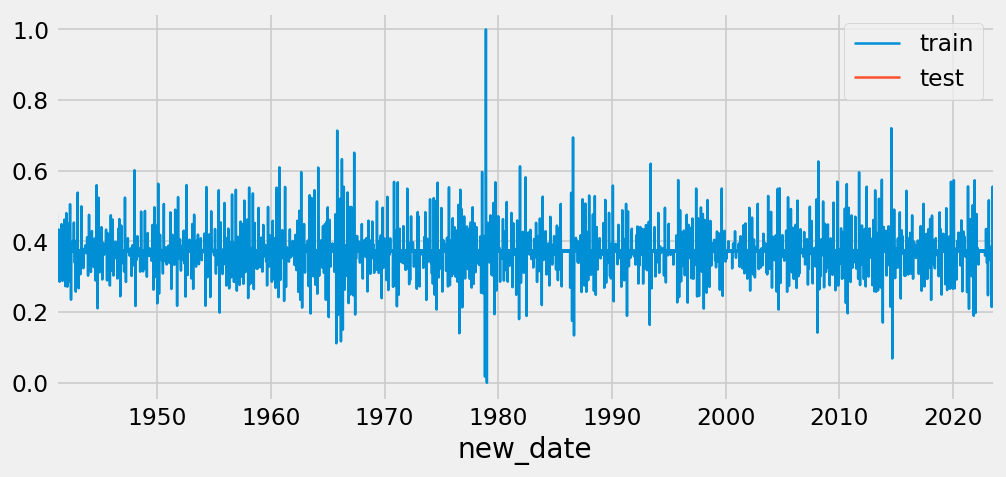

In [70]:
# Split data into train-test
# ==============================================================================
steps = 16
train = df3[:-steps]
test  = df3[-steps:]

print(train.shape)
print(test.shape)

print(f"Train dates : {train.index.min()} --- {train.index.max()}  (n={len(train)})")
print(f"Test dates  : {test.index.min()} --- {test.index.max()}  (n={len(test)})")

fig, ax=plt.subplots(figsize=(9, 4))
train['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
test['Precipitation_Amount_decomposed'].plot(ax=ax, label='test')
ax.legend()


In [71]:
model = ARIMA(train, order=(1,1,1), freq='D')
model_fit = model.fit()
print(model_fit.summary())

C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:     Precipitation_Amount_decomposed   No. Observations:                30178
Model:                              ARIMA(1, 1, 1)   Log Likelihood               84905.548
Date:                             Fri, 29 Mar 2024   AIC                        -169805.096
Time:                                     15:23:28   BIC                        -169780.152
Sample:                                 01-01-1941   HQIC                       -169797.095
                                      - 08-16-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0360      0.007     -5.061      0.000      -0.050      -0.022
ma.L1          0.3506      

In [72]:
# Tune the ARIMA model
# Create a function to find the best ARIMA model
def find_best_arima_model(train, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    model = ARIMA(train, order=order)
                    model_fit = model.fit()
                    aic = model_fit.aic
                    if aic < best_score:
                        best_score, best_cfg = aic, order
                    print('ARIMA%s AIC=%.3f' % (order, aic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.3f' % (best_cfg, best_score))
    return best_cfg

In [73]:
# Find the best ARIMA model
p_values = [0,1,2,4,6,8,10]
d_values = range(0,3)
q_values = range(0,3)
find_best_arima_model(train, p_values, d_values, q_values)

C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) AIC=-146033.389


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) AIC=-167253.076


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 0, 2) AIC=-176562.941


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0) AIC=-166957.722


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) AIC=-169798.061


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 1, 2) AIC=-169855.281


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 2, 0) AIC=-154705.182


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 2, 1) AIC=-166908.267


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(0, 2, 2) AIC=-169749.127


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) AIC=-170987.557


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) AIC=-175935.390


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 0, 2) AIC=-177783.090


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) AIC=-168898.961


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) AIC=-169805.096


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2) AIC=-175888.043


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 2, 0) AIC=-155821.850


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 2, 1) AIC=-168848.745


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(1, 2, 2) AIC=-169583.987


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 0) AIC=-177097.512


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 1) AIC=-177172.005


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 0, 2) AIC=-177800.931


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 1, 0) AIC=-171645.085


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1) AIC=-177009.562


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2) AIC=-175867.843


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 2, 0) AIC=-157934.530


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 2, 1) AIC=-171311.982


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(2, 2, 2) AIC=-168854.313


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 0, 0) AIC=-177543.974


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 0, 1) AIC=-177735.644


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 0, 2) AIC=-177801.237


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 1, 0) AIC=-173646.597


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 1) AIC=-175166.311


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 1, 2) AIC=-176547.326


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(4, 2, 0) AIC=-163827.085


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 1) AIC=-167897.463


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(4, 2, 2) AIC=-173476.109


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 0, 0) AIC=-177796.254


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 0, 1) AIC=-177781.003


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 0, 2) AIC=-177796.663


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 1, 0) AIC=-174749.064


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 1, 1) AIC=-174673.773


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 1, 2) AIC=-176759.494


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(6, 2, 0) AIC=-166563.822


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 1) AIC=-167484.011


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(6, 2, 2) AIC=-174126.442


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 0, 0) AIC=-177799.385


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 0, 1) AIC=-177797.861


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 0, 2) AIC=-177796.406


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 1, 0) AIC=-175234.768


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 1) AIC=-175452.312


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 1, 2) AIC=-177188.062


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(8, 2, 0) AIC=-168277.182


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 2, 1) AIC=-168796.951


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(8, 2, 2) AIC=-173566.396


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 0, 0) AIC=-177796.421


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 0, 1) AIC=-177794.383


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 0, 2) AIC=-177792.469


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 1, 0) AIC=-175595.878


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 1, 1) AIC=-175569.408


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(10, 1, 2) AIC=-176461.962


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ARIMA(10, 2, 0) AIC=-169581.913


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(10, 2, 1) AIC=-170872.691


C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(10, 2, 2) AIC=-172557.091
Best ARIMA(4, 0, 2) AIC=-177801.237


(4, 0, 2)

In [74]:
# Create the ARIMA model using the best parameters
model = ARIMA(train, freq='D', order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\deniz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                      
Dep. Variable:     Precipitation_Amount_decomposed   No. Observations:                30178
Model:                              ARIMA(2, 0, 2)   Log Likelihood               88906.466
Date:                             Fri, 29 Mar 2024   AIC                        -177800.931
Time:                                     15:55:39   BIC                        -177751.042
Sample:                                 01-01-1941   HQIC                       -177784.928
                                      - 08-16-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3733      0.000   1581.297      0.000       0.373       0.374
ar.L1          0.4977      

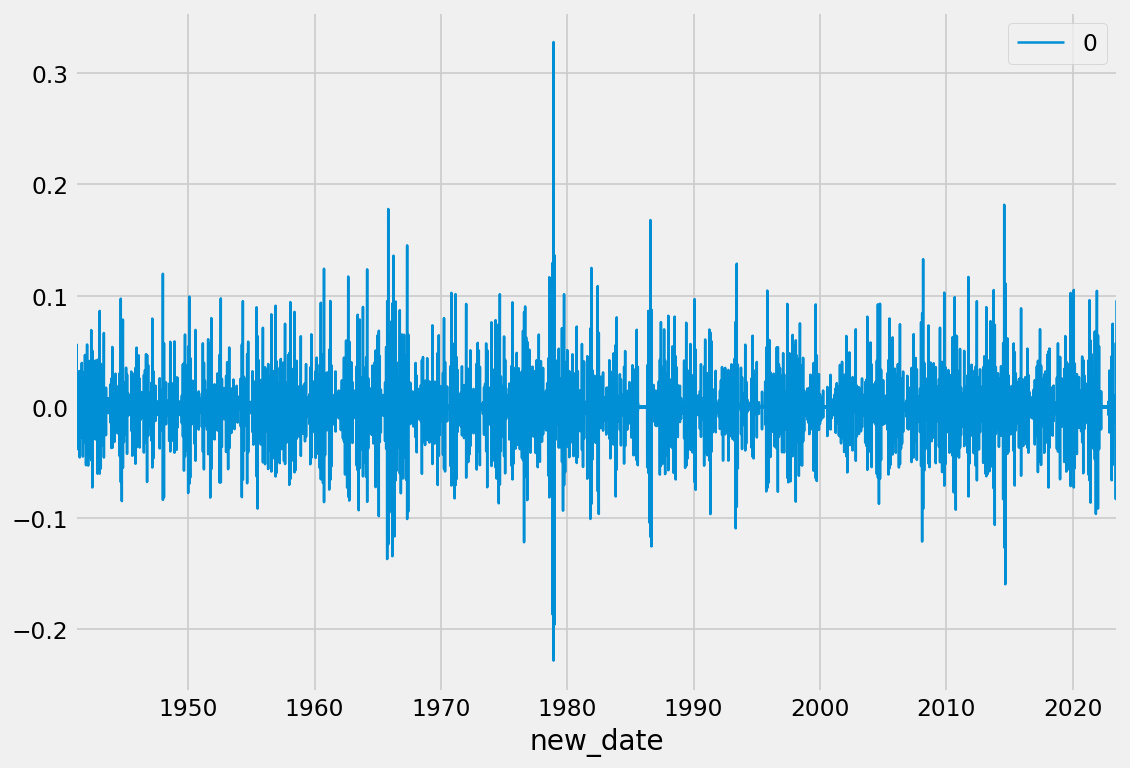

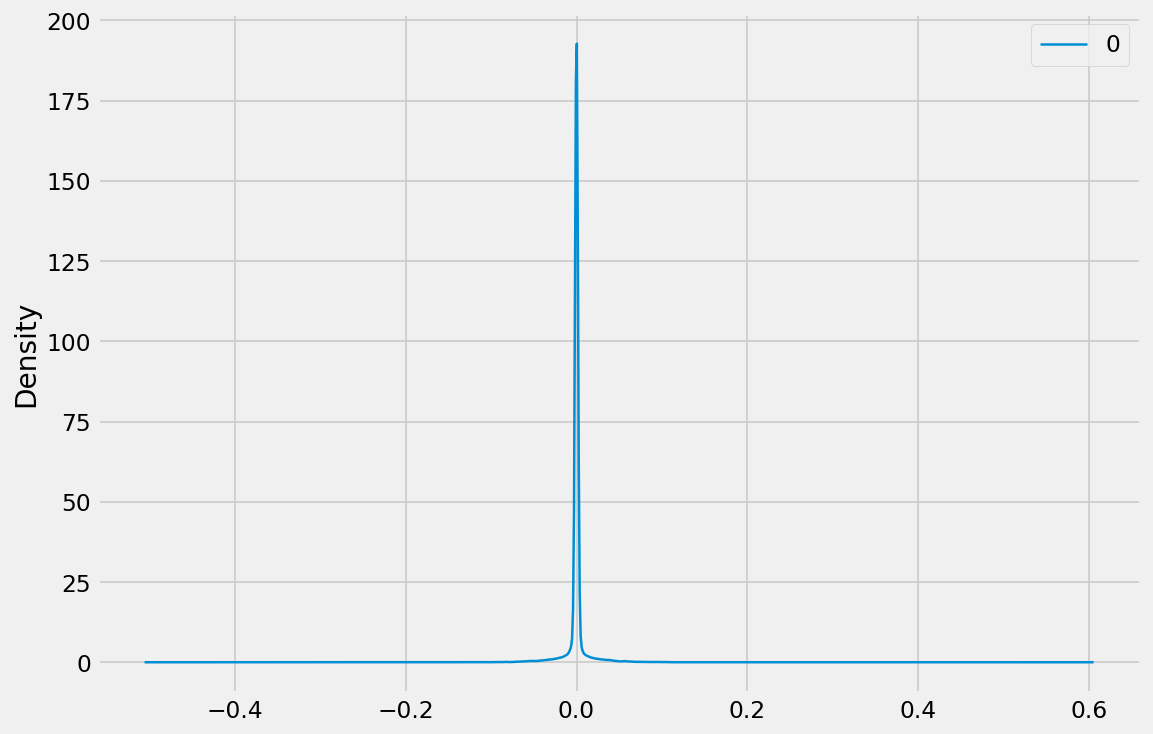

                  0
count  30178.000000
mean       0.000002
std        0.012714
min       -0.228090
25%       -0.000326
50%       -0.000059
75%        0.000241
max        0.327952


In [75]:
# Plot the residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [76]:
# Generate predictions
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

In [77]:
# Create a function to plot the predictions
def plot_predictions(predictions, test):
    plt.figure(figsize=(20,10))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Precipitation Amount')
    plt.title('Actual vs Predicted Precipitation Amount')
    plt.legend()
    plt.show()
    
# Create a function to calculate the RMSE and R2 score
def calculate_metrics(test, predictions):
    rmse = np.sqrt(mean_squared_error(test, predictions))
    r2 = r2_score(test, predictions)
    print('The RMSE is', rmse)
    print('The R2 score is', r2)

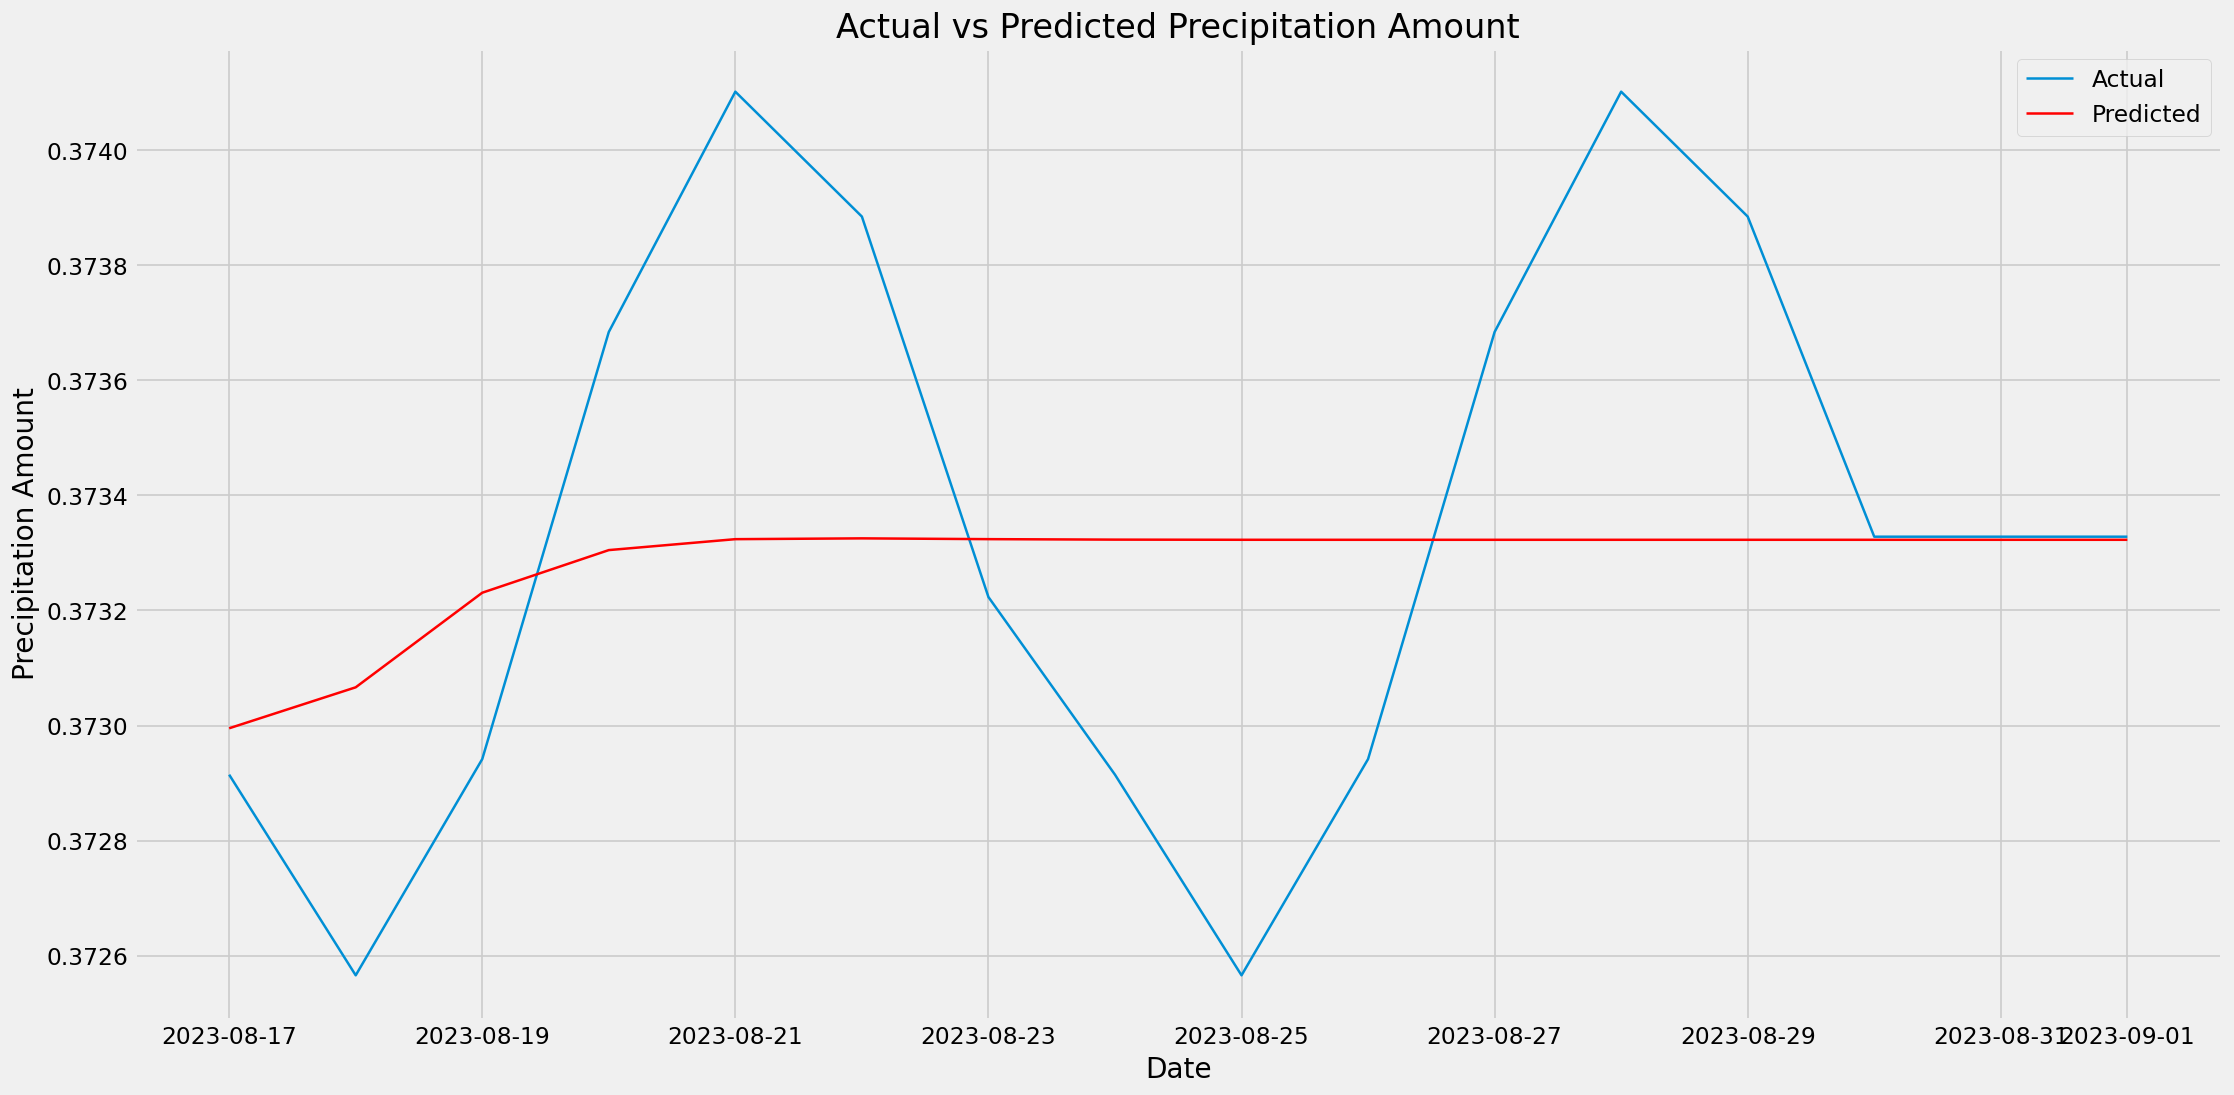

The RMSE is 0.00045747346366554543
The R2 score is -21.013524883858356


In [78]:
# Plot the predictions against the actual values
plot_predictions(predictions, test)

# Calculate the RMSE, MAPE, MAE, and R2 score
calculate_metrics(predictions, test)

In [80]:
# Generate predictions for the entire dataset
predictions_full = model_fit.predict(start=0, end=len(df3) - 1)

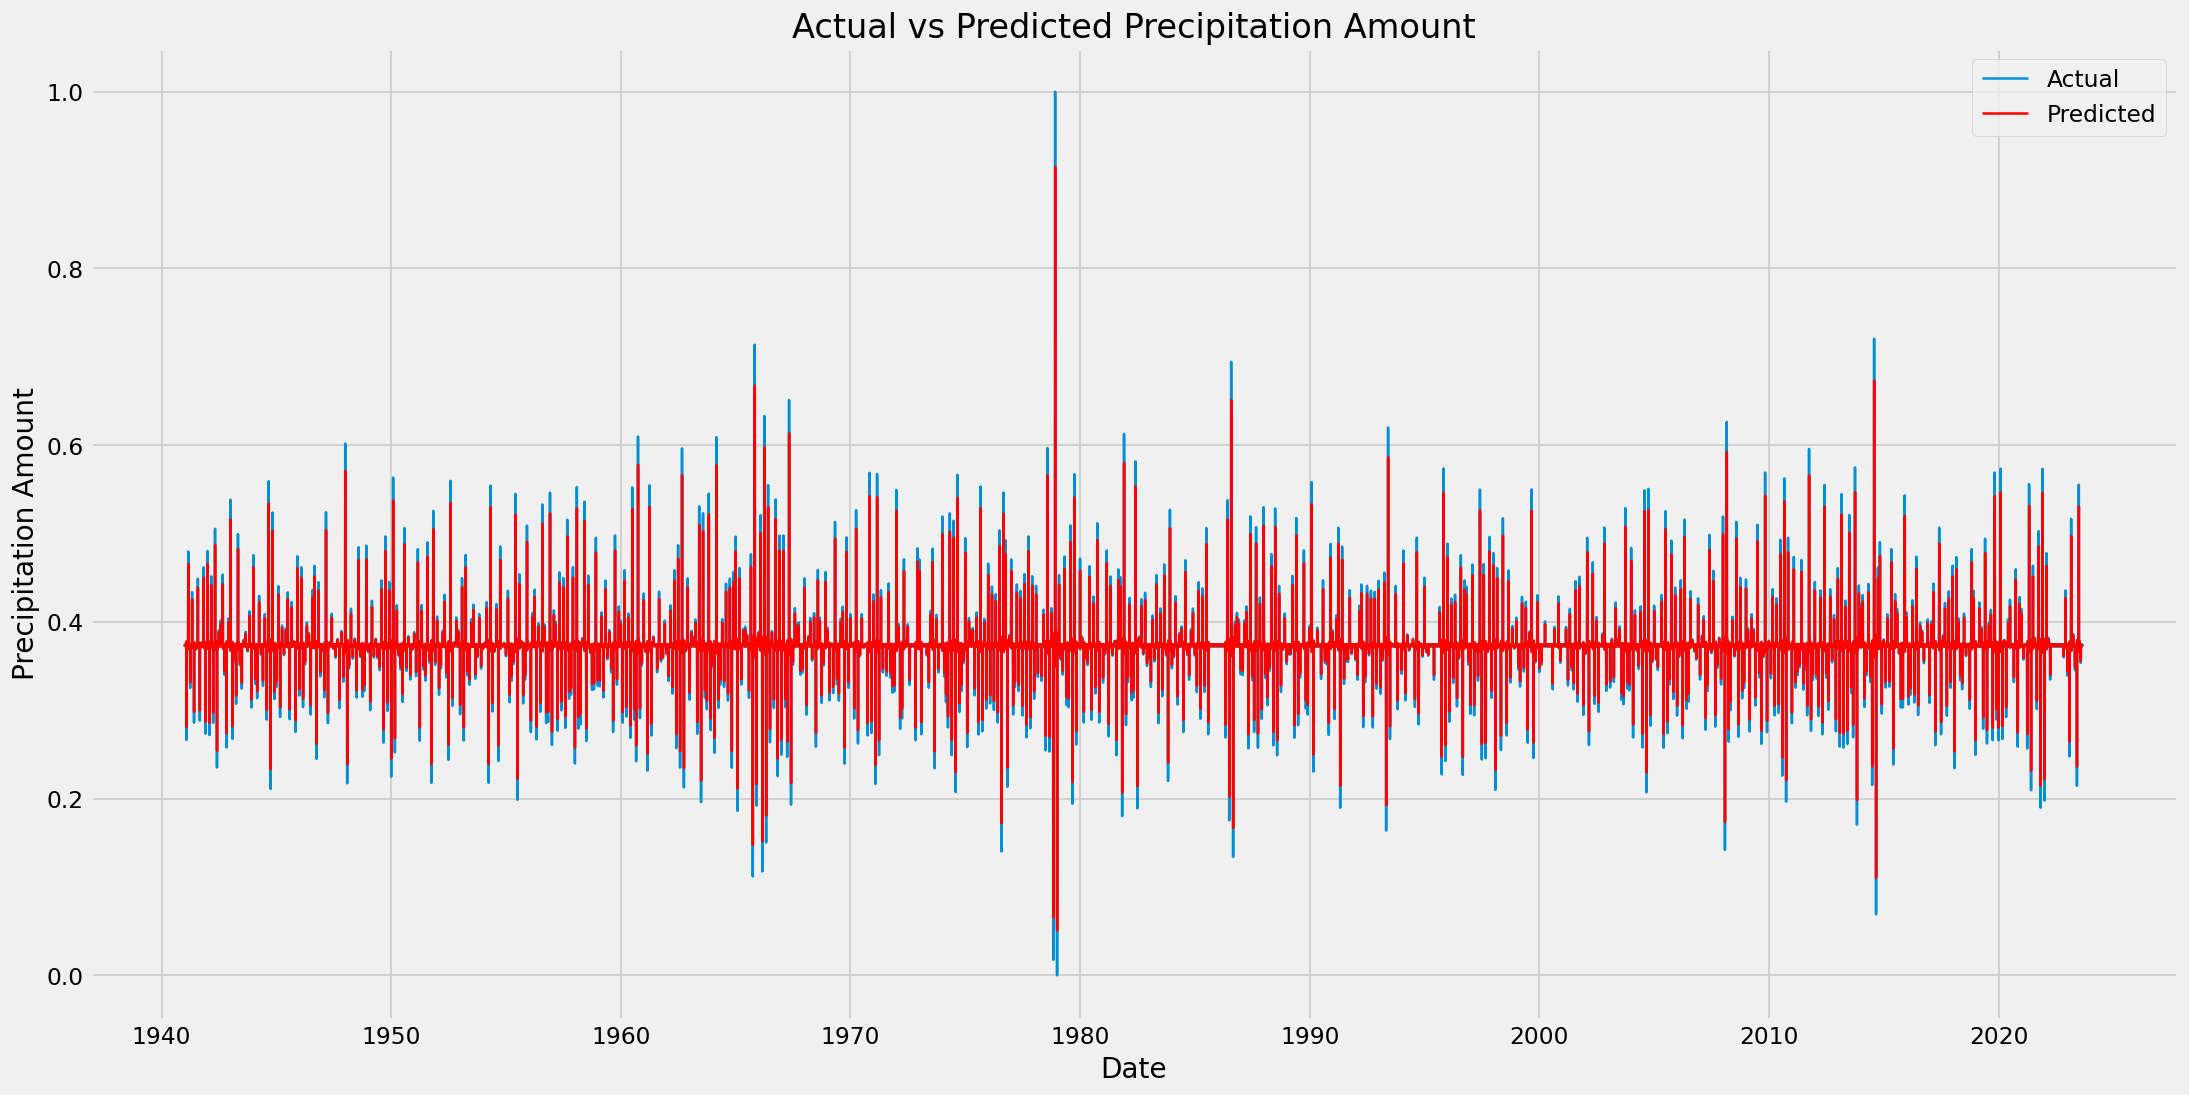

In [81]:
# Plot the entire time series with the predictions
plot_predictions(predictions_full, df3)

In [82]:
# Predict the sentiment score for the next 7 days
predictions_next_week = model_fit.predict(start=len(df3), end=len(df3) + 6)
predictions_next_week = scaler.inverse_transform(predictions_next_week.values.reshape(-1,1))
predictions_next_week = pd.DataFrame(predictions_next_week, columns=['Precipitation_Amount_decomposed'])
predictions_next_week['new_date'] = pd.date_range(start=df3.index.max() + pd.Timedelta(days=1), end=df3.index.max() + pd.Timedelta(days=7))
predictions_next_week.set_index('new_date', inplace=True)
predictions_next_week

,Precipitation_Amount_decomposed
new_date,
2023-09-02,-0.000186
2023-09-03,-0.000186
2023-09-04,-0.000186
2023-09-05,-0.000186
2023-09-06,-0.000186
2023-09-07,-0.000186
2023-09-08,-0.000186


In [83]:
# Predict the sentiment score for the next 31 days
predictions_next_month = model_fit.predict(start=len(df3), end=len(df3) + 30)
predictions_next_month = scaler.inverse_transform(predictions_next_month.values.reshape(-1,1))
predictions_next_month = pd.DataFrame(predictions_next_month, columns=['Precipitation_Amount_decomposed'])
predictions_next_month['new_date'] = pd.date_range(start=df3.index.max() + pd.Timedelta(days=1), end=df3.index.max() + pd.Timedelta(days=31))
predictions_next_month.set_index('new_date', inplace=True)
predictions_next_month

,Precipitation_Amount_decomposed
new_date,
2023-09-02,-0.000186
2023-09-03,-0.000186
2023-09-04,-0.000186
2023-09-05,-0.000186
2023-09-06,-0.000186
2023-09-07,-0.000186
2023-09-08,-0.000186
2023-09-09,-0.000186
2023-09-10,-0.000186


In [84]:
# 3 months
predictions_next_3months = model_fit.predict(start=len(df3), end=len(df3) + 89)
predictions_next_3months = scaler.inverse_transform(predictions_next_3months.values.reshape(-1,1))
predictions_next_3months = pd.DataFrame(predictions_next_3months, columns=['Precipitation_Amount_decomposed'])
predictions_next_3months['new_date'] = pd.date_range(start=df3.index.max() + pd.Timedelta(days=1), end=df3.index.max() + pd.Timedelta(days=90))
predictions_next_3months.set_index('new_date', inplace=True)
predictions_next_3months

,Precipitation_Amount_decomposed
new_date,
2023-09-02,-0.000186
2023-09-03,-0.000186
2023-09-04,-0.000186
2023-09-05,-0.000186
2023-09-06,-0.000186
...,...
2023-11-26,-0.000186
2023-11-27,-0.000186
2023-11-28,-0.000186


ValueError: x and y must have same first dimension, but have shapes (963,) and (30194,)

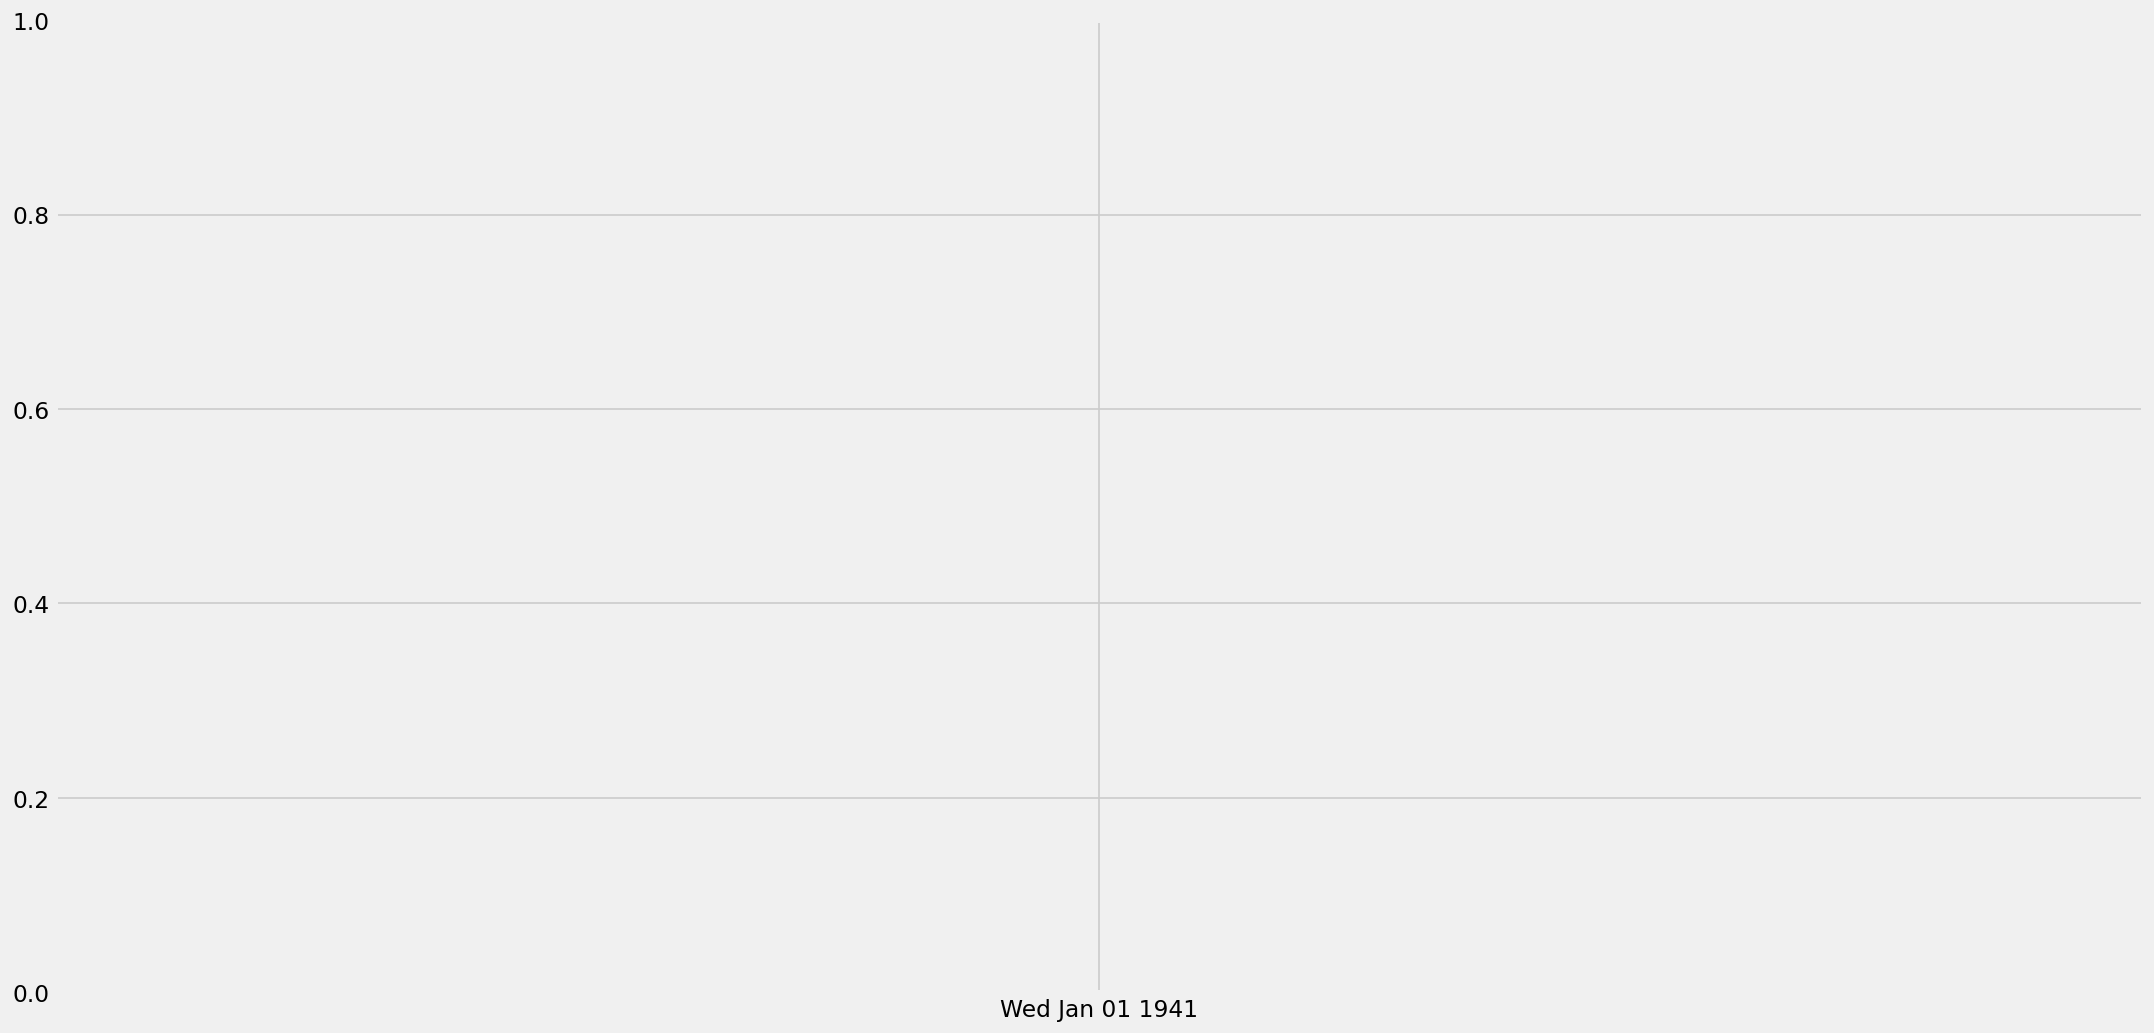

In [87]:
# Plot the entire time series with the predictions
plt.figure(figsize=(20,10))
plt.plot(df['new_date'], df2['Precipitation_Amount'], label='Actual')
plt.plot(predictions_next_3months, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Precipitation_Amount')
plt.title('Actual vs Predicted Precipitation Amount')
plt.legend()
plt.show()

In [88]:
df4 = df[['new_date', 'Precipitation_Amount_decomposed']]

KeyError: "['Precipitation_Amount_decomposed'] not in index"

In [ ]:
# move the full_date column to the index and set the frequency to daily
df4.set_index('new_date', inplace=True)
df4.index.freq = 'D'

In [ ]:
# Verify that a temporary index is complete
# ==============================================================================
(df4.index == pd.date_range(start=df4.index.min(),
                             end=df4.index.max(),
                             freq=df4.index.freq)).all()

In [ ]:
# Split data into train-test
# ==============================================================================
steps = 16
data_train = df4[:-steps]
data_test  = df4[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
data_test['Precipitation_Amount_decomposed'].plot(ax=ax, label='test')
ax.legend()

In [ ]:
# Create and train forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster.fit(y=data_train['Precipitation_Amount_decomposed'])
forecaster

In [ ]:
# Predictions
# ==============================================================================
steps = 16
predictions = forecaster.predict(steps=steps)
predictions.head(5)

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
data_test['Precipitation_Amount_decomposed'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [ ]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['Precipitation_Amount_decomposed'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

In [ ]:
# Hyperparameter Grid search
# ==============================================================================
steps = 16
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [10, 20]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = data_train['Precipitation_Amount_decomposed'],
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_squared_error',
                        initial_train_size = int(len(data_train)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

In [ ]:
# Grid Search results
# ==============================================================================
results_grid

In [ ]:
# Create and train forecaster with the best hyperparameters
# ==============================================================================
regressor = RandomForestRegressor(max_depth=3, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 20
             )

forecaster.fit(y=data_train['Precipitation_Amount_decomposed'])

In [ ]:
# Predictions
# ==============================================================================
predictions = forecaster.predict(steps=steps)

In [ ]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
data_train['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
data_test['Precipitation_Amount_decomposed'].plot(ax=ax, label='test')
predictions.plot(ax=ax, label='predictions')
ax.legend()

In [ ]:
# Test error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = data_test['Precipitation_Amount_decomposed'],
                y_pred = predictions
                )

print(f"Test error (mse): {error_mse}")

In [ ]:
# Now we will use the entire dataset to train the model
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 20
             )

forecaster.fit(y=df4['Precipitation_Amount_decomposed'])

In [ ]:
# Make 7 day predictions
# ==============================================================================
steps = 7
predictions7 = forecaster.predict(steps=steps)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
df4['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
predictions7.plot(ax=ax, label='predictions')
ax.legend()

In [ ]:
# Make 31 day predictions
# ==============================================================================
steps = 31
predictions31 = forecaster.predict(steps=steps)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
df4['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
predictions31.plot(ax=ax, label='predictions')
ax.legend()

In [ ]:
# Make 3 month predictions
# ==============================================================================
steps = 90
predictions90 = forecaster.predict(steps=steps)

# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
df2['Precipitation_Amount_decomposed'].plot(ax=ax, label='train')
predictions90.plot(ax=ax, label='predictions')
ax.legend()

In [ ]:
# Create a dashboard to display the predictions

# select the Bootstrap stylesheet2 and figure template2 for the theme toggle here:
template_theme1 = "sketchy"
template_theme2 = "darkly"
url_theme1 = dbc.themes.SKETCHY
url_theme2 = dbc.themes.DARKLY

dbc_css = (
    "https://cdn.jsdelivr.net/gh/AnnMarieW/dash-bootstrap-templates@V1.0.1/dbc.min.css"
)

# Create the app
app = dash.Dash(__name__, external_stylesheets=[url_theme2, dbc_css])

# Load the figure templates for the Bootstrap themes
templates = ["bootstrap", "minty", "pulse", "flatly", "quartz", "cyborg", "darkly", "vapor"]
load_figure_template(templates)

# Create the layout
app.layout = dbc.Container([
    html.Div(
        children=[
            html.H1(
                children= "Precipitation Amount Prediction"
                ),
            html.Div(
                children= "Select the time period to predict"
                ),
            dcc.Dropdown(
                id='dropdown', 
                options=[
                    {'label': '1 Week', 'value': '7'},
                    {'label': '1 Month', 'value': '31'},
                    {'label': '3 Months', 'value': '90'}
                    ], 
                value='7'
                ),
            dcc.Graph(
                id='graph', 
                figure='darkly'
                )
            ]
        )
    ],
                           fluid=True,
                           className="dbc dbc-ag-grid"
                           )

    
# Create the callback function
@app.callback(Output('graph', 'figure'), [Input('dropdown', 'value')])
def update_graph(value):
    if value == '7':
        predictions = predictions7
    elif value == '31':
        predictions = predictions31
    else:
        predictions = predictions90
    return {
        'data': [{
            'x': df2.index,
            'y': df2['Precipitation_Amount_decomposed'],
            'name': 'Actual'
        }, {
            'x': predictions.index,
            'y': predictions,
            'name': 'Predicted'
        }],
        'layout': {
            'title': 'Precipitation Amount Decomposed Prediction'
        }
    }


# Run the app
if __name__ == '__main__':
    app.run_server(debug=False)

In [ ]:
cr

In [ ]:
# Group the dataframe by full_date and calculate the mean of the sentiment_score
df = df.groupby('date').mean().reset_index()

In [ ]:
# Check the dataframe
print(df.head(3))
print(df.tail(3))

In [ ]:
start_date = df['date'].min()
end_date = df['date'].max()
idx = pd.date_range(start_date, end_date)

# Tarih aralığını kullanarak eksik tarihleri içeren bir DataFrame oluştur
df_missing_dates = pd.DataFrame({'date': idx})

# Veri çerçevesini eksik tarihlerle birleştir
df = pd.concat([df_missing_dates.set_index('date'), df.set_index('date')], axis=1, join='outer').reset_index()

# Dataframe'i kontrol et
print(df.head(10))

In [ ]:
# Fill in the null values using interpolation
df['Precipitation_Amount'] = df['Precipitation_Amount'].interpolate(method='linear')

In [ ]:
# Perform EDA on the new dataframe
print("Shape: ")
print(df.shape)
print("\n" + "Columns: ")
print(df.columns)
print("\n" + "Data Types: ")
print(df.dtypes)
print("\n" + "Missing Values: ")
print(df.isnull().sum())
print("\n" + "Unique Values: ")
print(df.nunique())
print("\n" + "Value Counts: ")
print(df['Precipitation_Amount'].value_counts())
print("\n" + "Percentage of Value Counts: ")
print(df['Precipitation_Amount'].value_counts(normalize=True))
print("\n" + "Summary Statistics: ")
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,10))


In [ ]:
df.head()

In [ ]:
# Plot the sentiment_score
plt.figure(figsize=(15,8))
plt.plot(df['date'], df['Precipitation_Amount'])
plt.xlabel('date')
plt.ylabel('Precipitation Amount')
plt.title('Precipitation Amount vs Date')
plt.show()


In [ ]:
X = df[['Year', 'Month']]
Y = df['Precipitation_Amount'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))  
model.add(Dense(1, activation='linear'))  

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, Y_train, epochs=150, batch_size=32, verbose=2)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val))

In [ ]:
scores = model.evaluate(X, Y)
print("Loss: %.2f" % scores)

In [ ]:
predictions = model.predict(X)

In [ ]:
predictions

In [ ]:
rounded = [round(x[0]) for x in predictions]

In [ ]:
rounded

Depending on the results obtained, it seems more logical to re-evaluate the results using a different modem.

# decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_model = DecisionTreeRegressor(random_state=42)

tree_model.fit(X_train, Y_train)

tree_predictions = tree_model.predict(X_test)

tree_mse = mean_squared_error(Y_test, tree_predictions)
print("Decision Tree Model Mean Squared Error:", tree_mse)

# Support Vector Machines - SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [ ]:
svm_model = SVR(kernel='rbf') 

svm_model.fit(X_train, Y_train)

svm_predictions = svm_model.predict(X_test)

svm_mse = mean_squared_error(Y_test, svm_predictions)
print("SVM Model Mean Squared Error:", svm_mse)

modelin iyilestirilmesi gerekiyor, kuru gurultulerin tespit edilip silinmesi icin calisicam

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month

df['unix_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

df['new_Precipitation_Amount'] = df['Precipitation_Amount'] * 2

df['sum_date_Precipitation'] = df['unix_date'] + df['Precipitation_Amount']

print(df)

In [ ]:
from scipy.stats.mstats import winsorize
from scipy.stats import zscore

In [ ]:
z_scores = (df - df.mean()) / df.std()

# Belirli bir eşik değeri (örneğin, 3) üzerinde olan değerleri outlier olarak tanımlama
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Outlier'ları veri setinden temizleme
df_cleaned = df[~outliers]

# Örnek olarak, 0.05 ve 0.95 yüzdelik dilimlerdeki değerler arasında sınırlama yapalım
df_winsorized = df.apply(lambda x: winsorize(x, limits=[0.05, 0.95]))


In [ ]:
df.head()

In [ ]:
from scipy.stats.mstats import winsorize

# Veri setinizdeki her bir özellik için Z-Skoru hesaplama
z_scores = (df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']] - df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']].mean()) / df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']].std()

# Belirli bir eşik değeri (örneğin, 3) üzerinde olan değerleri outlier olarak tanımlama
outliers = (np.abs(z_scores) > 3).any(axis=1)

# Outlier'ları veri setinden temizleme
df_cleaned = df[~outliers]

# Winsorizing ile outlier'ları sınırlama
df_winsorized = df[['Year', 'Month', 'Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']].apply(lambda x: winsorize(x, limits=[0.05, 0.95]))

# Temizlenmiş veri setini kullanarak modelinizi yeniden eğitme
# Önce X ve Y'yi güncelleyin
X = df_cleaned[['Year', 'Month']]
Y = df_cleaned['Precipitation_Amount'] 

# Daha sonra X ve Y'yi kullanarak modelinizi eğitin

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'val_accuracy'])
print(model.history.history.keys())

In [ ]:
train_acc = model.history.history['acc']
val_acc = model.history.history['val_acc']

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

scores = model.evaluate(X_val, Y_val, verbose=0)
print("Validation Accuracy: %.2f%%" % (scores[1]*100))

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print(history.history.keys())

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
scores = model.evaluate(X,Y)
print("%s: %.2f%%" % (model.metrics_names[0], scores*100))

In [ ]:
df.reset_index(drop=True, inplace=True)

df['Year'] = [d.year for d in df.date]
df['Month'] = [d.strftime('%b') for d in df.date]
years = df['Year'].unique()

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='Precipitation_Amount', data=df, ax=axes[0])
sns.boxplot(x='Month', y='Precipitation_Amount', data=df.loc[~df.Year.isin([1941, 203]), :], ax=axes[1])

axes[0].set_title('Box Plot by Years\n(The Trend)', fontsize=18); 
axes[1].set_title('Box Plot by Months\n(The Seasonality)', fontsize=18)

axes[0].tick_params(axis='x', labelrotation=55)
axes[1].tick_params(axis='x', labelrotation=50)

plt.show()

In [ ]:
annual_rainfall = df.groupby('Year')['Precipitation_Amount'].sum()

def plot_df(df, x, y, title="", xlabel='Year', ylabel='Daily Rainfall Amount', dpi=100):
    plt.figure(figsize=(12,6), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=50)
    plt.grid(True)
    plt.show()

plot_df(df, x=annual_rainfall.index, y=annual_rainfall.values, title='Annual Rainfall Amount in Ireland from 1941 to 2023')

In [ ]:
x = df['Year'].values
y1 = df['Precipitation_Amount'].values

plt.figure(figsize=(16,5), dpi=100)
plt.fill_between(x, y1=y1, where=(y1 >= 0), interpolate=True, color='lightgreen', alpha=0.7, label='Above 0')

plt.hlines(y=0, xmin=np.min(x), xmax=np.max(x), linewidth=.5, color='black')

plt.title('Daily Rainfall Amount', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Precipitation Amount')
plt.grid(True)
plt.legend()

plt.show()

To measure the imputation performance, I manually introduce missing values to the time series, impute it with above approaches and then measure the mean squared error of the imputed against the actual values.

In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

columns_with_missing_values = ['Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']

df['unix_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in columns_with_missing_values:
    f = interp1d(df['unix_date'].values, df[column].values, kind='linear', fill_value='extrapolate')
    df[f'{column}_interp'] = f(df['unix_date'])

mse_values = {}
for column in columns_with_missing_values:
    mse = mean_squared_error(df[column], df[f'{column}_interp'])
    mse_values[column] = mse
    print(f'Mean Squared Error for {column}: {mse:.2f}')

fig, axes = plt.subplots(len(columns_with_missing_values), 1, figsize=(10, 5 * len(columns_with_missing_values)))

for i, column in enumerate(columns_with_missing_values):
    ax = axes[i]
    ax.plot(df['date'], df[column], label='Original')
    ax.plot(df['date'], df[f'{column}_interp'], label='Interpolated')
    ax.set_title(f'Linear Interpolation for {column} - MSE: {mse_values[column]:.2f}')
    ax.legend()

correlation_matrix = df[columns_with_missing_values + [f'{col}_interp' for col in columns_with_missing_values]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Original and Interpolated Values')
plt.show()

In [ ]:
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

df['date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

columns_with_missing_values = ['Precipitation_Amount', 'Greatest_Daily_Fall', 'Number_of_Rainy_Days', 'Number_of_Wet_Days']

df['unix_date'] = (df['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

for column in columns_with_missing_values:
    f = interp1d(df['unix_date'].values, df[column].values, kind='linear', fill_value='extrapolate')
    df[f'{column}_interp'] = f(df['unix_date'])

mse_values = {}
for column in columns_with_missing_values:
    mse = mean_squared_error(df[column], df[f'{column}_interp'])
    mse_values[column] = mse
    print(f'Mean Squared Error for {column}: {mse:.2f}')

fig, axes = plt.subplots(len(columns_with_missing_values), 1, figsize=(10, 5 * len(columns_with_missing_values)))

for i, column in enumerate(columns_with_missing_values):
    ax = axes[i]
    ax.plot(df['date'], df[column], label='Original')
    ax.plot(df['date'], df[f'{column}_interp'], label='Interpolated')
    ax.set_title(f'Linear Interpolation for {column} - MSE: {mse_values[column]:.2f}')
    ax.legend()

correlation_matrix = df[columns_with_missing_values + [f'{col}_interp' for col in columns_with_missing_values]].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Original and Interpolated Values')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import kpss

result = kpss(df['Precipitation_Amount'].values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


According to the results, it can be assumed that the time series is stationary. However, it would be appropriate to perform another test to understand and interpret the characteristics of each time series.

In [ ]:
# ADF Test
from statsmodels.tsa.stattools import adfuller, kpss
result = adfuller(df['Precipitation_Amount'].values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic (-19.122370675575556), This can be interpreted as evidence that the time series does not have a unit root (it is stationary). p-value (0.0), This value is quite small, even zero. This means that the null hypothesis (that the time series has no unit root) should be rejected. In this case, the time series is considered stationary. Critical Values: In this case, the null hypothesis (that the time series has no unit root) is rejected and the time series is assumed to be stationary.

As a result, according to the given ADF test results, it can be said that the time series is stationary (there is no unit root). This means that the time series can be predicted with a specific model and the trends are more stable. However, before accepting these results as definitive, it is important to consider other properties of the time series and modeling requirements.

In [ ]:
from scipy import signal

detrended = signal.detrend(df.Precipitation_Amount.values)
plt.figure(figsize=(8,5))
plt.plot(detrended)
plt.title('Precipitation Amount whose trend was reduced by removing the least squares fit', fontsize=12)
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df['Precipitation_Amount'].values.tolist())

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
# pacf_50 = pacf(df.value, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df['Precipitation_Amount'].tolist(), lags=50, ax=axes[0])
plot_pacf(df['Precipitation_Amount'].tolist(), lags=50, ax=axes[1])

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ss.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Sun Spots Area \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.15)    

fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(a10.value, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Drug Sales', y=1.05)    
plt.show()

In [ ]:
# Lag Plot

from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Precipitation_Amount'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Lag Plots of Precipitation Amount', y=1.05)
plt.tight_layout()
plt.show()

In [ ]:
def ApEn(U, m, r):
    """Compute Approximate Entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))


# Veri Seti Üzerinde Approximate Entropy Hesaplama
apen_value = ApEn(df['Precipitation_Amount'], m=2, r=0.2*np.std(df['Precipitation_Amount']))

print(apen_value)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

month_mapping = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'Jun': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

df['Month'] = df['Month'].map(month_mapping)

df['Precipitation_Amount'] = df.date.dt.month
grangercausalitytests(df[['Precipitation_Amount', 'Month']], maxlag=2)

As a result, when the p value is 1.0, we can think that there is no causality between the two variables or that the causality process is very low for the tested lag values, so let's observe the same thing during the year.

In [ ]:
df['Precipitation_Amount'] = df.date.dt.year
df['Year']= df['Year'].astype(int)
grangercausalitytests(df[['Precipitation_Amount', 'Year']], maxlag=2)

We can conclude that the "Year" variable does not provide causality to the "Precipitation_Amount" variable for both the first and second lag. So, we can comment that the "Year" variable does not have a significant effect on "Precipitation_Amount". In this case, we can say that it does not make sense to use the "Year" variable to predict or explain the "Precipitation_Amount" variable.

In [ ]:
# Time Series Decomposition
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose
result_mul = seasonal_decompose(df['Precipitation_Amount'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = (df.Precipitation_Amount.values).values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Drug Sales Deseasonalized', fontsize=16)
plt.plot()